# 19-1. 들어가며

## Face detection, 얼마나 작고 빨라질 수 있을까?
---
지난 시간까지 카메라 스티커앱을 만들면서 이미지 속의 얼굴을 빠르고 정확하게 인식하는 방법에 대해 고민해 왔습니다. 첫번째로 고려해본 방법은 Dlib 라이브러리를 이용해서 Face Landmark를 찾아내는 것이었습니다. 하지만 그것만으로는 충분하지 않았었죠.

이번 시간에는 Dlib 얼굴 인식에서 개선해 볼 포인트와 YOLO, SSD 등 Face Detection을 위한 딥러닝 모델들에 대해 같이 알아보는 시간을 가져볼게요.

본격적으로 시작하기에 앞서 아래 그림을 한 번 보실까요? 5개의 모델의 성능을 비교한 그림인데요, 가로 축은 inference time 즉, 인공지능 모델이 학습된 후 새로운 데이터를 입력 받아 예측하는 데 소요되는 시간을 나타내며, 세로 축은 mAP 지표로 Object Detection 분야에서 자주 사용되는 성능 지표로서 높을 수록 좋은 성능을 나타냅니다.

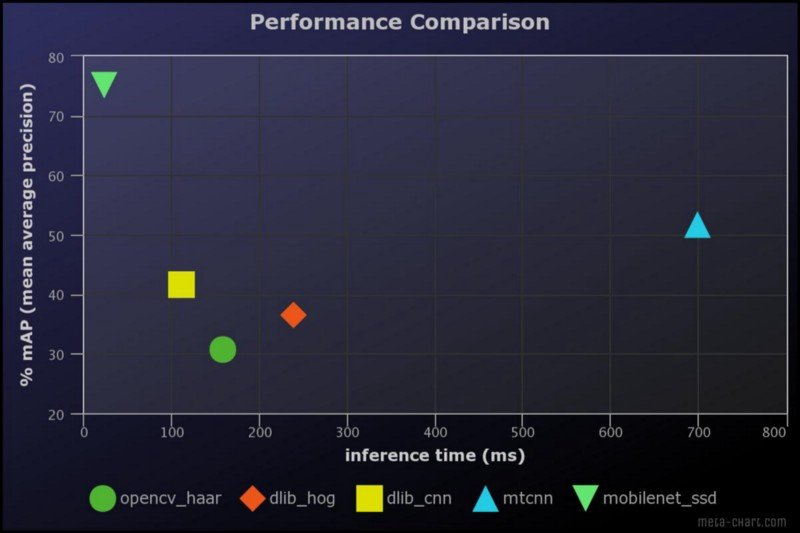
[openCV_Haar, dlib_hog는 CPU로 dlib_cnn, mtcnn, mobilenet_ssd는 GPU로 돌린 실험 결과(inference time)](https://seongkyun.github.io/study/2019/03/25/face_detection/)

YOLO(You Only Look Once)에서 추론(Inference) 과정은 입력 이미지를 받아 객체를 감지하고, 그 위치와 클래스를 예측하는 과정을 포함합니다. YOLO는 실시간 객체 감지에 특화된 알고리즘으로, 빠르고 효율적인 추론 과정을 가집니다. 다음은 YOLO에서의 추론 과정을 단계별로 설명합니다.

### 1. 이미지 전처리
- **입력 조정**: 추론을 시작하기 전에, 입력 이미지는 YOLO 모델이 훈련될 때 사용된 입력 크기로 조정(resize)됩니다. 이는 일반적으로 정사각형 형태입니다 (예: 416x416 픽셀).

### 2. 신경망을 통한 특징 추출
- **특징 맵 생성**: YOLO는 컨볼루션 신경망(CNN)을 사용하여 이미지에서 특징을 추출합니다. 이 과정에서 여러 크기의 특징 맵이 생성됩니다.

### 3. 객체 감지 및 위치 예측
- **바운딩 박스 및 클래스 확률**: YOLO는 특징 맵에서 각 그리드 셀에 대해 여러 개의 바운딩 박스를 예측합니다. 각 박스는 객체가 있을 확률, 박스의 위치(중심 x, y 좌표, 너비, 높이), 그리고 박스가 포함하고 있는 객체의 클래스에 대한 확률을 포함합니다.

### 4. 임계값 처리 및 비최대 억제
- **임계값 필터링**: 낮은 신뢰도를 가진 예측은 임계값을 기준으로 제거됩니다. 이는 객체가 있을 확률이 낮은 바운딩 박스를 걸러내는 과정입니다.
- **비최대 억제(Non-Maximum Suppression, NMS)**: 여러 개의 겹치는 박스 중 최고의 박스만을 선택하는 과정입니다. 이는 동일 객체에 대한 중복된 감지를 줄이는 데 도움을 줍니다.

### 5. 최종 감지 결과
- **객체 감지 결과**: 처리 과정을 거친 후, YOLO는 이미지 내 감지된 객체의 위치(바운딩 박스), 각 객체의 클래스, 그리고 신뢰도 점수를 최종 출력합니다.

YOLO의 추론 과정은 매우 빠르게 진행되며, 이는 실시간 비디오 스트림이나 고속 카메라 피드에서 객체를 감지하는 데 특히 유용합니다. YOLO의 핵심은 하나의 신경망을 통해 전체 이미지를 한 번에 처리하고, 객체의 위치와 클래스를 동시에 예측한다는 점에 있습니다. 이는 기존의 단계적인 접근 방식(예: 객체 제안 후 분류)보다 훨씬 빠른 처리 속도를 가능하게 합니다.

**[아이스브레이킹] 만약 우리가 실시간 처리를 위해서 사진에서 주어진 5개 모델 중 하나를 활용해야 한다면, 어떤 모델이 가장 적합할까요?**

A.  아무래도 inference time이 빠르고, 그에 대비해 성능도 우수한 mobilenet_ssd가 좋아보이는군요!

---

실시간 처리를 위한 사진에서 객체를 감지하려면, 처리 속도와 정확도의 균형이 중요합니다. 5개의 대표적인 객체 감지 모델 중에서 실시간 처리에 가장 적합한 모델을 선택하려면 다음과 같은 모델들을 고려할 수 있습니다:

1. **YOLO (You Only Look Once)**: YOLO는 실시간 객체 감지에 매우 효과적인 모델입니다. 한 번의 추론으로 전체 이미지에서 객체의 위치와 분류를 동시에 수행합니다. 빠른 처리 속도가 필요한 실시간 시스템에 매우 적합합니다.


2. **SSD (Single Shot MultiBox Detector)**: SSD도 YOLO와 유사하게 빠른 처리 속도를 제공합니다. 다양한 크기의 특징 맵을 사용하여 다양한 크기의 객체를 감지할 수 있는 장점이 있습니다.


3. **Faster R-CNN**: 이 모델은 정확도가 높지만 YOLO나 SSD에 비해 상대적으로 처리 속도가 느립니다. 실시간 처리에는 다소 제한적일 수 있습니다.


4. **RetinaNet**: RetinaNet은 속도와 정확도의 균형이 잘 맞춰져 있지만, YOLO나 SSD보다는 다소 느린 편입니다. Focal loss를 사용해 작은 객체의 감지 성능을 개선했습니다.


5. **EfficientDet**: 최신 모델 중 하나로, 효율성과 정확도를 균형있게 제공합니다. 하지만 실시간 처리에는 YOLO나 SSD가 더 나을 수 있습니다.


### 결론
실시간 처리를 위해 가장 중요한 요소가 빠른 추론 속도라면 **YOLO**나 **SSD**가 가장 적합합니다. 이 모델들은 높은 속도를 유지하면서도 상당한 정확도를 제공합니다. YOLO는 특히 실시간 비디오 스트림 처리에 널리 사용되며, SSD는 다양한 크기의 객체를 효과적으로 감지하는 능력이 뛰어납니다.

## 학습 목표
---
- dlib을 활용한 얼굴 인식 방법에서 개선해야 할 포인트를 스스로 체크할 수 있습니다.
- YOLO, SSD 등 성능 개선을 위한 딥러닝 모델에 대해 이해할 수 있습니다.
- SOTA Face Detection 모델들을 설명할 수 있습니다.


## 학습 내용
---
- Dlib 얼굴 인식의 문제점
    - dlib 라이브러리를 이용하여 얼굴의 랜드마크를 찾아낼 때의 문제점을 짚어보아요.
    
    
- Single Stage Object Detection
    - 2-stage detector에 비해 상대적으로 속도가 빠른 1-stage 기반의 모델들을 공부해봅시다.
    
    
- YOLO(1) YOLO v1의 등장
    - Object Detection의 획기적인 발전을 이끌게 된 YOLO 모델의 개요를 살펴보아요.
    
    
- YOLO(2) YOLO v1의 원리
    - YOLO v1의 특징과 원리에 대해 공부해봅시다.
    
    
- YOLO(3) YOLO v1의 성능
    - YOLO v1의 loss function에 대해 이해하고, 모델 성능에 대해 이해해봅시다.
    
    
- YOLO(4) YOLO v2
    - YOLO v1에서 정확도를 더 끌어올린 YOLO v2에 대해 알아보고, 무엇이 달라졌는지 확인해보아요.
    
    
- YOLO(5) YOLO v3
    - YOLO v3의 원리와 전체적인 모델의 아키텍쳐에 대해 공부해봅시다.
    
    
- YOLO v3 그 이후
    - YOLO v3 이후에는 어떻게 버전 업이 되었는지 볼까요?
    
    
- SSD(1) SSD의 특징
    - YOLO v1의 단점을 보완하기 위해 SSD에서 제안한 테크닉들을 살펴보아요.
    
    
- SSD(2) SSD의 Loss와 성능
    - SSD의 loss function에 대해 이해하고, 모델 성능에 대해 이해해봅시다.
    
    
- Face Detection을 위한 모델들
    - YOLO와 SSD 외에도 SOTA Face Detection 모델들에 대해 알아보아요.

이 학습 계획은 얼굴 인식과 객체 감지 분야에서 dlib, YOLO, SSD 등의 모델을 이해하고, 최신 얼굴 감지 모델에 대한 지식을 넓히는 데 중점을 두고 있습니다. 각 항목별로 구체적인 설명을 드리겠습니다.

### 학습 목표
1. **Dlib을 활용한 얼굴 인식 방법에서의 개선점 체크**: dlib 라이브러리를 사용한 얼굴 인식 방법의 한계를 이해하고, 어떻게 개선할 수 있는지 스스로 판단하는 능력을 개발합니다.
   
   
2. **1-stage 딥러닝 모델 이해**: 1-stage 객체 감지 모델들의 작동 원리와 장단점을 이해합니다.


3. **SOTA(State of the Art) Face Detection 모델 설명**: 최신 얼굴 감지 기술에 대해 배우고 이를 설명할 수 있습니다.


### 학습 내용
1. **Dlib 얼굴 인식의 문제점**: dlib 라이브러리의 얼굴 랜드마크 감지 기능의 한계점을 탐구합니다.


2. **Single Stage Object Detection**: 2-stage 모델에 비해 빠른 1-stage 모델들(YOLO, SSD)을 학습합니다.


3. **YOLO v1**: YOLO의 첫 번째 버전인 YOLO v1의 개요, 원리 및 성능을 학습합니다.


4. **YOLO v2 및 v3**: YOLO v1에 이어진 YOLO v2와 v3의 개선점과 아키텍처를 학습합니다.


5. **YOLO v3 이후의 발전**: YOLO v3 이후 버전들의 업데이트와 발전 방향을 이해합니다.


6. **SSD의 특징과 성능**: YOLO의 대안인 SSD 모델의 특징, loss function 및 성능을 학습합니다.


7. **Face Detection을 위한 최신 모델들**: YOLO와 SSD 외의 다른 최신 얼굴 감지 모델들에 대해 학습합니다.


### 추가 설명
- **dlib 개선점**: dlib은 전통적인 방법론에 기반한 얼굴 인식 방법을 제공하지만, 다양한 조명, 포즈, 표정에서의 정확도와 속도 측면에서 한계를 가질 수 있습니다.


- **YOLO와 SSD**: 이들은 실시간 객체 감지에 효과적인 딥러닝 기반의 모델입니다. 각 모델의 원리, 구조, 그리고 성능 향상을 위한 기법들을 학습함으로써, 객체 감지 분야의 기술적 이해를 높일 수 있습니다.


- **최신 Face Detection 모델들**: MTCNN, RetinaFace 등과 같은 최신 얼굴 감지 모델들은 더 높은 정확도와 속도를 제공하며, 다양한 조건에서의 얼굴 감지 능력이 향상되었습니다.


이러한 학습 계획은 얼굴 인식과 객체 감지 분야에 대한 깊이 있는 이해를 쌓고, 최신 기술 트렌드를 파악하는 데 도움이 될 것입니다.

# 19-2. Dlib 얼굴 인식의 문제점


**Q. Dlib 라이브러리를 이용해 Face Landmark를 찾아낼 때의 문제점은 무엇이었나요?**

A.  

얼굴을 잘 못 찾는다.
동영상을 처리하기엔 너무 느리다.
얼굴각도, 방향, 크기 등의 변화에 취약하다.
그 외에도 많은 문제점을 발견할 수 있다.

---
Dlib 라이브러리는 얼굴 인식 및 랜드마크 감지에 널리 사용되는 도구입니다. 그러나 Dlib의 얼굴 랜드마크 감지 기능에는 몇 가지 한계점이 있습니다:

### 1. 정확도와 견고성
- **포즈와 조명**: Dlib의 얼굴 랜드마크 감지는 극단적인 얼굴 각도, 조명 변화, 부분적인 얼굴 가림 등의 조건에서 정확도가 떨어질 수 있습니다.
- **다양한 표정**: 강한 표정 변화 시 랜드마크의 정확도가 저하될 수 있습니다.

### 2. 실시간 처리
- **속도 문제**: Dlib는 실시간 처리에 있어서 최적화가 부족할 수 있어, 고속 카메라나 실시간 스트리밍에서의 사용에 제한적일 수 있습니다.

### 3. 다양성 대응
- **얼굴 유형**: 다양한 인종, 연령, 성별의 얼굴에 대한 인식률이 균일하지 않을 수 있습니다. 특히, 훈련 데이터가 제한적일 경우, 다양한 얼굴 유형에 대한 감지 정확도가 떨어질 수 있습니다.

### 4. 확장성과 범용성
- **맞춤형 튜닝의 어려움**: Dlib는 일반적인 사용 사례에 대해 우수한 성능을 제공하지만, 특정 응용 프로그램에 맞게 랜드마크 감지 알고리즘을 세밀하게 조정하기 어려울 수 있습니다.

### 5. 리소스 사용
- **컴퓨팅 자원**: 높은 정확도를 달성하기 위해 비교적 많은 컴퓨팅 자원을 소모할 수 있으며, 이는 모바일 장치나 리소스가 제한된 환경에서의 사용을 어렵게 만들 수 있습니다.

이러한 한계점에도 불구하고, Dlib는 여전히 얼굴 인식 및 랜드마크 감지 분야에서 매우 유용한 도구입니다. 그러나 특정 응용 프로그램이나 요구 사항에 따라 다른 기술이나 방법을 고려해야 할 수도 있습니다. 최근에는 딥러닝 기반의 방법론이 이러한 한계를 극복하는 데 도움을 주고 있으며, 더 강력한 얼굴 인식 및 랜드마크 감지 솔루션을 제공하고 있습니다.


## 왜 작아지고 빨라지는 게 중요할까요?
---

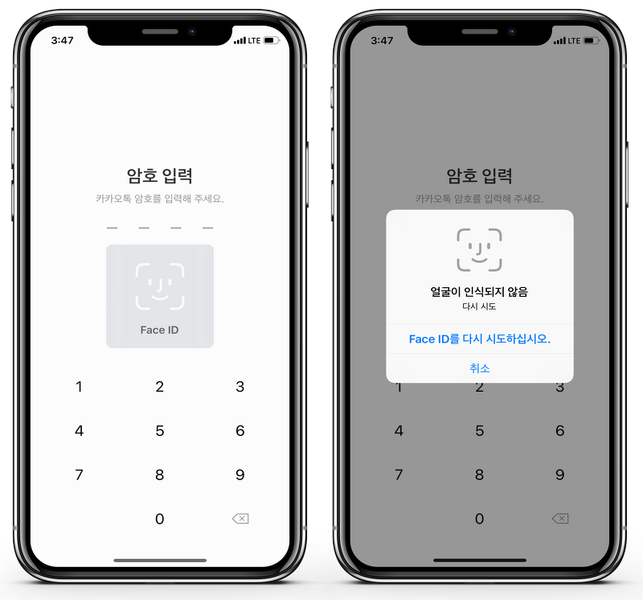

우선 비대면 인증수단으로 얼굴인식이 보편적으로 사용되기 시작했다는 점을 들 수 있습니다. 얼굴 인식을 위해 딥러닝 서버 구동이 필요한 모델을 활용할 수 있을까요?

서버로 이미지를 보낸 후 처리하는 방식은 네트워크 비용 + 서버 비용 + 인터넷 속도의 영향을 고려하지 않을 수 없습니다. 따라서 네트워크 상황과 무관하게 항상 동작해야 하는 핸드폰 인증 수단으로는 적합하지 않습니다. 그렇다면 edge device(= 핸드폰)를 바로 이용하려면 어떻게 해야 할까요?

핸드폰에 모델을 올리려면 weight가 작은 모델이 관리에 유리합니다. 하지만 일반적으로 작은 모델은 성능이 떨어지기 때문에 어떻게 보완할 수 있을지 고민이 시작됩니다.

국내 IT 대기업들도 관련 연구를 활발히 진행하고 있습니다. 아랫글들을 통해 상세한 내용을 참고하시기 바랍니다.

- [카카오 얼굴인식 관련 리서치](https://tech.kakaoenterprise.com/63)
- [네이버 얼굴검출 관련 오픈소스](https://github.com/clovaai/EXTD_Pytorch)

## 어떻게 빠르게 만들 수 있을까요?
---

Face detection에서 많은 시간이 드는 요소는 Sliding window입니다. 그러므로 Sliding window를 버려야 빨라집니다. 따라서 2-stage 방식의 detection은 좋은 선택이 아닙니다.

또 연산의 병렬화가 가능해야 합니다. 컴퓨터의 GPU에서는 병렬화가 가능하지만 핸드폰에서도 병렬화가 가능할까요?

크게는 안드로이드와 아이폰의 경우로 나누어 생각해볼 수 있습니다. 안드로이드에서는 MLKit, 아이폰에서는 CoreML이라는 라이브러리를 통해 병렬화를 할 수 있습니다. 하지만 제한이 많기 때문에 TFLite라는 도구를 이용하여 훈련된 모델을 이용하기도 합니다.

- [Core ML](https://developer.apple.com/documentation/coreml)
- [ios 11 machine learning for everyone](http://machinethink.net/blog/ios-11-machine-learning-for-everyone/)
- [ML kit](https://developers.google.com/ml-kit)
- [TFLite](https://www.tensorflow.org/lite?hl=ko)


위 방법으로도 해결이 안 된다면 어렵더라도 다른 방법을 생각해봐야 합니다. 우선 직접 병렬프로그래밍 라이브러리를 만들어 볼 수 있겠네요~! 하지만 그 난이도는 어마어마하겠죠? 비교적 쉬운 방법으로는 병렬화 도구를 사용하는 방법이 있습니다.

- [SIMD-병렬-프로그래밍](https://stonzeteam.github.io/SIMD-%EB%B3%91%EB%A0%AC-%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D/)
- [OpenCL](https://www.khronos.org/opencl/)
- [Android: Open GL ES](https://developer.android.com/guide/topics/graphics/opengl?hl=ko)


하지만 무엇보다도 적은 파라미터 수로도 정확한 성능을 가지는 모델을 설계하는 게 중요하겠죠? 다음 스텝부터 알아보도록 합시다.

# 19-3. Single Stage Object Detection

아마도 여러분은 2-Stage Detector은 정확도는 높지만 실행속도(FPS)가 느리다는 것을 이미 공부해서 알고 있을 것입니다.

간단히 정리하자면 2-Stage Detector는 물체가 존재하는 bounding box를 먼저 찾은(localization) 후에 bounding box를 분류(classification)하는 두 가지 과정을 순차적으로 거쳤기 때문에, 속도가 느렸습니다.

하지만 이전 스텝에서 살펴본 것처럼, 얼굴 인식과 같이 딥러닝 모델이 가벼워야 하는 task는 1-Stage 기반을 사용하는 것이 유리합니다. 1-Stage Detector는 localization과 classification을 동시에 수행합니다. 따라서 2단계를 거치는 2-Stage Detector보다는 속도가 빠릅니다. 하지만 정확도가 낮다는 단점도 있습니다.

아래의 그림에서 2-Stage Detector와 1-Stage Detector에 해당하는 모델이 어떤 것이 있는지 볼 수 있습니다.


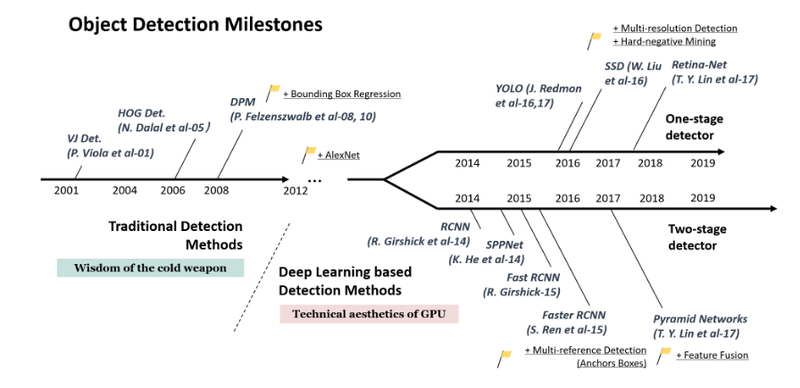
[Object Detection Milestones](https://arxiv.org/pdf/1905.05055.pdf)

**Q. 1-Stage Detector와 2-Stage-Detector의 차이점은 무엇인가요?**

A.  

1-Stage Detector는 물체의 위치와 클래스를 한번에 예측하는 모델이며, 2-Stage Detector는 물체의 위치와 클래스를 예측하는 과정을 두 단계로 나눈 모델입니다. 즉, 1-Stage Detector는 단일 네트워크를 이용하여 물체 검출을 수행하는 반면, 2-Stage Detector는 여러 개의 네트워크를 이용하여 검출을 수행합니다.

1-Stage Detector가 2-Stage Detector보다 상대적으로 속도는 빠르지만, 정확도가 낮다는 특징이 있습니다.

---

1-Stage Detector와 2-Stage Detector는 객체 감지(Object Detection) 분야에서 사용되는 두 가지 주요한 접근 방식입니다. 이들의 차이는 주로 감지 방법의 속도와 정확도에서 발생합니다.

### 2-Stage Detector
1. **작동 원리**: 
   - 첫 번째 단계에서는 객체 후보(Region Proposals)를 식별합니다. 이는 이미지 내에서 객체가 있을 가능성이 있는 영역을 추출하는 과정입니다. 
   - 두 번째 단계에서는 각 객체 후보에 대해 분류(Classification)와 바운딩 박스 회귀(Bounding Box Regression)를 수행하여 정확한 객체 위치와 종류를 파악합니다.

2. **대표적인 예**: R-CNN, Fast R-CNN, Faster R-CNN

3. **장점**: 일반적으로 더 높은 정확도를 제공합니다. 객체 후보 영역을 미리 식별함으로써 감지의 정밀도를 높일 수 있습니다.

4. **단점**: 처리 속도가 상대적으로 느립니다. 두 단계를 거쳐야 하기 때문에 실시간 처리나 속도가 중요한 응용 프로그램에는 적합하지 않을 수 있습니다.

### 1-Stage Detector
1. **작동 원리**:
   - 이미지 전체를 한 번에 처리하여 객체의 위치와 분류를 동시에 수행합니다. 객체 후보를 미리 식별하는 단계 없이, 직접 객체의 위치와 클래스를 예측합니다.

2. **대표적인 예**: YOLO (You Only Look Once), SSD (Single Shot MultiBox Detector)

3. **장점**: 빠른 처리 속도를 제공합니다. 단일 단계에서의 처리로 실시간 객체 감지와 같이 속도가 중요한 응용 프로그램에 적합합니다.

4. **단점**: 2-Stage Detector에 비해 정확도가 다소 낮을 수 있습니다. 특히 작은 객체나 겹쳐 있는 객체의 감지에서 정확도가 떨어질 수 있습니다.

### 결론
- **속도 대 정확도**: 1-Stage Detector는 속도가 빠르지만 정확도가 다소 낮을 수 있으며, 2-Stage Detector는 높은 정확도를 제공하지만 처리 속도가 느립니다.
- **용도에 따른 선택**: 실시간 감지나 컴퓨팅 자원이 제한적인 환경에서는 1-Stage Detector가, 높은 정확도가 필요한 경우에는 2-Stage Detector가 더 적합할 수 있습니다.

혹시 이전에 공부했던 Object Detection과 관련해서 복습이 필요하다면 아래 참고자료를 활용해 주세요.

- [Fast Detection Models](https://lilianweng.github.io/lil-log/2018/12/27/object-detection-part-4.html)

- [What do we learn from single shot object detectors, FPN & Focal loss?](https://jonathan-hui.medium.com/what-do-we-learn-from-single-shot-object-detectors-ssd-yolo-fpn-focal-loss-3888677c5f4d)

- [윗글의 번역본](https://murra.tistory.com/17)

이후 스텝에서 우리는 1-stage(Single stage) Object detection 모델을 위주로 하여 Face detection에 적합한 딥러닝 모델들에 대해 탐색해 보겠습니다. YOLO, SSD, RetinaNet 등 이 분야의 모델들의 발전사는 딥러닝 분야에서도 매우 흥미진진한 이력을 가지고 있으니, 함께 살펴봅시다.

# 19-4. YOLO (1) YOLO v1의 등장

## YOLO : You Only Look Once
---

YOLO라는 모델의 네이밍 센스는 과연 어디에서 왔을까요? YOLO라는 유명한 모델을 언급하려면 절대 빼놓을 수 없는 한 사람이 있습니다. 바로 Joseph Redmon, 즉 YOLO 논문의 1 저자이자 C로 구현된 오픈소스 뉴럴 네트워크 Darknet의 제작자입니다.

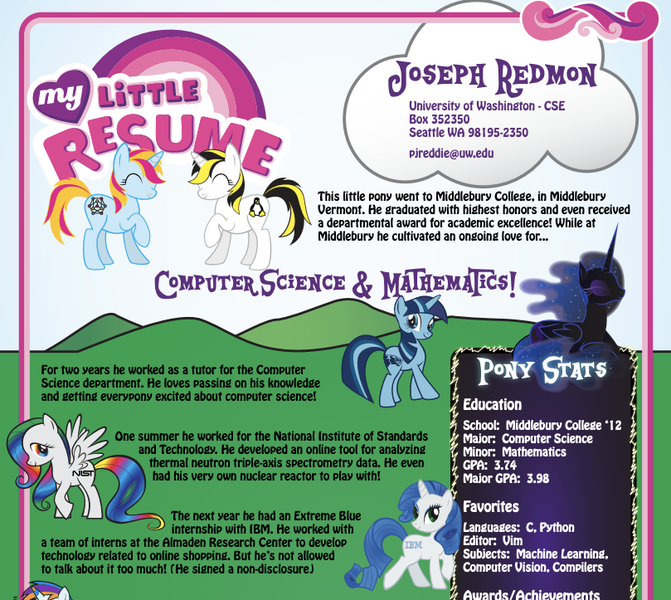
[Joseph Redmon의 이력서](https://pjreddie.com/static/Redmon%20Resume.pdf)


광고 전단지같이 생긴 위 그림은... 바로 Joseph Redmon의 이력서(CV)입니다. 장난같겠지만... 네, 실화입니다.😆

- Be famous.😎

## YOLO v1, big wave의 시작
---
YOLO의 출현은 당시 전 세계 computer vision 학계와 업계에 충격적일 정도의 기술 진보를 보여주었습니다. 우선 "You Only Look Once: Unified, Real-Time Object Detection"라는 제목의 영상을 먼저 소개하겠습니다. 영상은 2분 15초부터 보시면 됩니다!

https://youtu.be/NM6lrxy0bxs

- CVPR 2016..!

무려 2016년도에 CVPR oral session에서 실시간 데모를 해버립니다. 지금은 자연스러워 보일 수도 있지만, 당시 기술 수준을 생각해보면 이것은 충격과 공포 그 자체 였습니다.


- "아니 detection이 실시간으로 돌아간다고?? 초대형 서버도 아니고 학회장에서??"


'스타트업' 이라는 드라마에서 이 장면이 떠오르네요. YOLO vs. Faster R-CNN? 😆

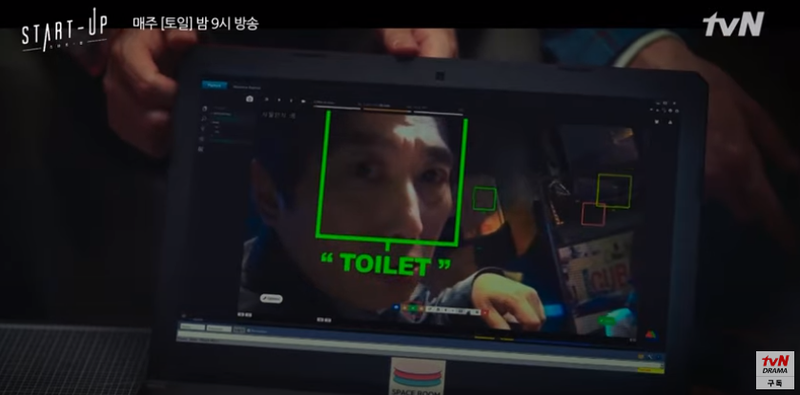
https://www.youtube.com/watch?v=6kpgXfjIuy0


실제로 YOLO를 실행했을 때의 결과는 아래의 그림과 같습니다. 사람을 비행기로 인식한 것 외에는 꽤 잘 detection하는 것 같죠?


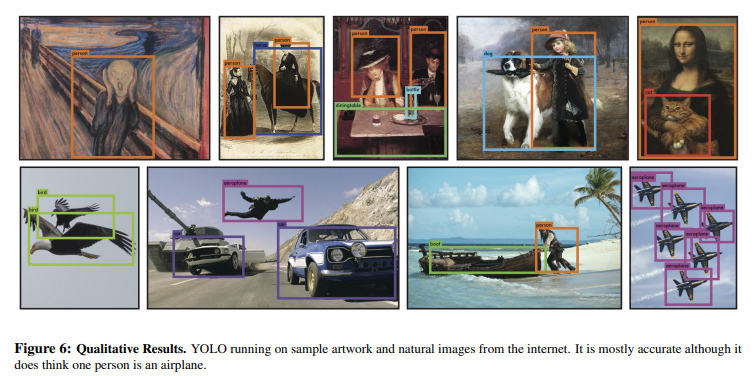
https://arxiv.org/pdf/1506.02640.pdf

**Q. 영상에서 2-Stage Detector의 대표 모델인 Faster R-CNN의 경우 mAP는 73.2, 속도는 7FPS(이미지 1장 당 140ms)로 소개되어 있는데요,
1-Stage Detector의 대표 모델인 YOLO의 경우에는 어느 정도의 성능을 보여준다고 하나요?**

A.  
YOLO v1의 경우 mAP 69.0, 속도는 45FPS(이미지 1장 당 22ms)로 소개되어 있습니다.
Faster R-CNN과 비교했을 때, 속도는 확실히 개선되었지만 mAP는 아주 쵸큼 딸리는군요


---

1-Stage Detector와 2-Stage Detector는 객체 감지(Object Detection) 분야에서 사용되는 두 가지 주요한 접근 방식입니다. 이들의 차이는 주로 감지 방법의 속도와 정확도에서 발생합니다.

### 2-Stage Detector
1. **작동 원리**: 
   - 첫 번째 단계에서는 객체 후보(Region Proposals)를 식별합니다. 이는 이미지 내에서 객체가 있을 가능성이 있는 영역을 추출하는 과정입니다. 
   - 두 번째 단계에서는 각 객체 후보에 대해 분류(Classification)와 바운딩 박스 회귀(Bounding Box Regression)를 수행하여 정확한 객체 위치와 종류를 파악합니다.

2. **대표적인 예**: R-CNN, Fast R-CNN, Faster R-CNN

3. **장점**: 일반적으로 더 높은 정확도를 제공합니다. 객체 후보 영역을 미리 식별함으로써 감지의 정밀도를 높일 수 있습니다.

4. **단점**: 처리 속도가 상대적으로 느립니다. 두 단계를 거쳐야 하기 때문에 실시간 처리나 속도가 중요한 응용 프로그램에는 적합하지 않을 수 있습니다.

### 1-Stage Detector
1. **작동 원리**:
   - 이미지 전체를 한 번에 처리하여 객체의 위치와 분류를 동시에 수행합니다. 객체 후보를 미리 식별하는 단계 없이, 직접 객체의 위치와 클래스를 예측합니다.

2. **대표적인 예**: YOLO (You Only Look Once), SSD (Single Shot MultiBox Detector)

3. **장점**: 빠른 처리 속도를 제공합니다. 단일 단계에서의 처리로 실시간 객체 감지와 같이 속도가 중요한 응용 프로그램에 적합합니다.

4. **단점**: 2-Stage Detector에 비해 정확도가 다소 낮을 수 있습니다. 특히 작은 객체나 겹쳐 있는 객체의 감지에서 정확도가 떨어질 수 있습니다.

### 결론
- **속도 대 정확도**: 1-Stage Detector는 속도가 빠르지만 정확도가 다소 낮을 수 있으며, 2-Stage Detector는 높은 정확도를 제공하지만 처리 속도가 느립니다.
- **용도에 따른 선택**: 실시간 감지나 컴퓨팅 자원이 제한적인 환경에서는 1-Stage Detector가, 높은 정확도가 필요한 경우에는 2-Stage Detector가 더 적합할 수 있습니다.

"You Only Look Once: Unified, Real-Time Object Detection"는 CVF 채널에서 유튜브 조회 수 1위 동영상입니다. 참고로 2위는 2 stage detector 기반인 Mask-R-NN이에요. Detection이 사람들이 얼마나 관심이 많은지 알 수 있는 대목입니다.

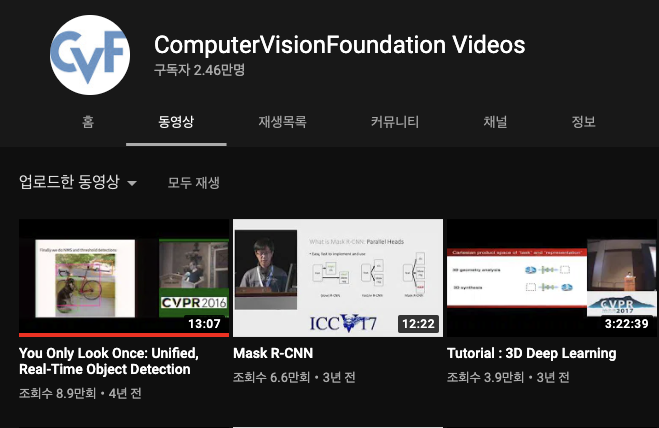
https://www.youtube.com/channel/UC0n76gicaarsN_Y9YShWwhw/videos?view=0&sort=p&flow=grid

# 19-5. YOLO (2) YOLO v1의 원리

이제부터 YOLO v1의 원리에 대해 알아보죠. YOLO를 설명한 논문은 [You Only Look Once:Unified, Real-Time Object Detection](https://arxiv.org/pdf/1506.02640.pdf)입니다. 이전 스텝에서 영상을 보았지만 논문을 통해 YOLO v1의 자세한 원리를 알아보는 것도 좋을 것입니다.

## YOLO 의 특징
---
YOLO의 특징은 'You Only Look Once: Unified, Real-Time Object Detection'라는 논문 제목에 잘 드러나 있습니다.

1. You Only Look Once

전체 이미지를 보는 횟수가 1회라는 것을 의미합니다. YOLO는 클래스에 대한 정보와 주변 정보까지 한번에 학습하고 처리합니다. 따라서 배경 오류가 적고 일반화 성능이 좋습니다.

2. Unified

Localization과 Classification을 동시에 수행합니다. YOLO는 이미지를 신경망에 넣어주기만 하면 바로 detection이 가능합니다.

3. Real-Time

기본적인 YOLO 모델로는 45FPS(초당 프레임수), 빠른 버전은 150FPS까지 성능을 보입니다. (참고로 Fast R-CNN은 0.5FPS, DPM은 30FPS의 성능을 가지고 있습니다.) 따라서 스트리밍 비디오에서도 실시간으로 객체를 detection할 수 있습니다.

그 외에도 Object detection을 회귀 문제로 관점을 전환했고, 여러 도메인에서 object detection이 가능하다는 특징이 있습니다.



## RCNN과 YOLO
---

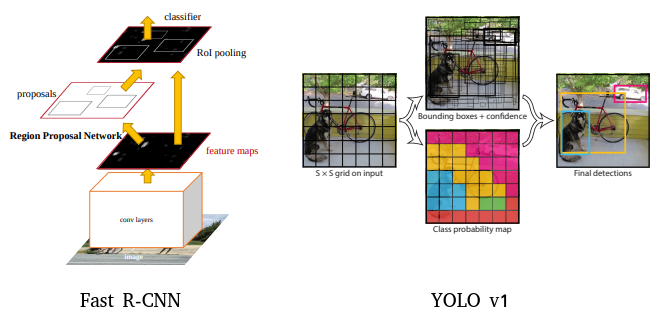
https://arxiv.org/pdf/1506.01497v3.pdf, https://arxiv.org/pdf/1506.02640.pdf


대표적인 2-stage detector인 RCNN과 1-stage detector인 YOLO 모델은 아래와 같이 기본 가정이 차이 납니다.

- RCNN 계열의 가정 :  

"객체가 존재할 것 같은 곳을 backbone network로 표현할 수 있다." → Region Proposal Network(RPN)


- YOLO v1의 가정 :  

"이미지 내의 작은 영역을 나누면 그곳에 객체가 있을 수 있다." → grid 내에 객체가 존재한다.


따라서 YOLO v1에서 grid는 고정되고, 각 grid 안에 객체가 있을 확률이 중요하게 됩니다.

**Q. YOLO v1에서 입력 이미지 크기가 448x448이고 출력 feature map이 7x7일 경우, 한 개의 출력 grid box(1x1 크기)가 의미하는 사이즈는 얼마일까요?**

A.  

448 / 7 = 64이므로 grid box 사이즈는 64x64이다.

---
YOLO v1에서 입력 이미지 크기가 448x448 픽셀이고, 출력 특징 맵(feature map)이 7x7 크기일 경우, 한 개의 출력 그리드 박스(1x1 크기)가 나타내는 실제 이미지 내의 영역 크기를 계산할 수 있습니다.

입력 이미지 크기를 출력 특징 맵의 크기로 나누면, 한 개의 출력 그리드 박스가 대표하는 입력 이미지 내의 영역 크기를 알 수 있습니다. 계산 방법은 다음과 같습니다:

1. **입력 이미지 크기**: 448x448 픽셀
2. **출력 특징 맵 크기**: 7x7 그리드

각 축(가로, 세로)에 대해 입력 이미지 크기를 출력 특징 맵의 그리드 수로 나눕니다:

- 가로축: 448 픽셀 / 7 = 64 픽셀
- 세로축: 448 픽셀 / 7 = 64 픽셀

따라서, YOLO v1에서 한 개의 출력 그리드 박스는 입력 이미지 내에서 64x64 픽셀 크기의 영역을 나타냅니다. 이는 YOLO 네트워크가 입력 이미지를 7x7 그리드로 나누어 각 그리드 셀마다 객체의 존재 여부 및 위치, 크기를 예측한다는 것을 의미합니다.

## YOLO의 grid cell
---

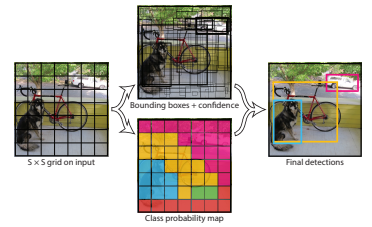

YOLO는 이미지를 S x S grid로 나누고, box regression 단계와 각 클래스마다 probability map을 구하는 단계가 동시에 병렬적으로 수행됩니다.

논문에서는 입력 이미지를 7 x 7 grid로 나누고, 각 grid cell마다 예측하는 bound box(bbox)를 2개, 총 클래스의 수는 20으로 정하였습니다.

각 grid cell은 bounding box(bbox)와 C개의 class 확률을 예측합니다.

각 bounding box(bbox, B)는 x, y, w, h, confidence score를 예측합니다. x, y는 bbox의 중심 좌표이고 w와 h는 너비와 높이입니다. 주의할 점은 w와 h는 입력 이미지를 bbox의 너비와 높이를 나눠서 normalize한 값으로, 0과 1 사이의 값을 가진다는 것입니다.

confidence score는 box가 객체를 포함하고 있는지를 모델이 얼마나 자신 있는지, 그리고 박스가 예측하는 것이 얼마나 정확한지를 보여줍니다. 이를 식으로 나타내면 아래와 같습니다.

$P(Object) * IOU_{pred}^{truth}$
 
만약 grid cell이 객체를 포함하지 않으면 P(Object)이 0이므로 confidence score는 0입니다. grid cell이 객체를 정확히 포함하고 있다면 P(Object)는 1이므로 결국 IoU만 남습니다. 따라서 confidence score가 예측된 box와 ground truth box 사이의 IoU와 같도록 하는 것이 좋겠죠?

C개의 조건부 클래스 확률 $P(Class ∣Object)$은 grid cell이 사물을 포함할 때 bbox 안의 객체가 i번째 클래스에 속할 확률입니다. bounding box의 개수와 상관 없이 각 grid cell의 확률만 예측합니다.

위의 내용을 정리하면 하나의 grid cell에 대해 아래와 같은 tensor가 나옵니다.

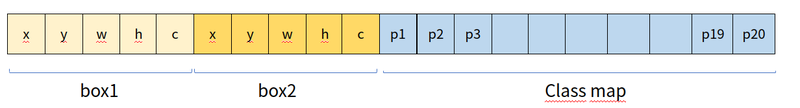
<center>[grid cell]</center>

**Q. 1개의 7x7 grid 당 2개의 bounidng box(BBox) 와 20개 클래스를 예측하는 YOLO 를 만들고 싶은 경우, output tensor의 크기와 이를 flatten했을 때의 크기는 무엇인가요?**

A.  output tensor의 크기는 7 x 7 x (5 x 2 + 20)이며, 이를 flatten하면 1470이다.


---

YOLO v1에서 한 개의 7x7 그리드 셀 당 2개의 바운딩 박스와 20개의 클래스를 예측하려면, 출력 텐서의 크기와 flatten(평탄화)했을 때의 크기를 계산할 수 있습니다. 각 바운딩 박스는 위치(4개 값: x, y, 너비, 높이), 신뢰도(1개 값), 그리고 20개의 클래스 각각에 대한 확률을 포함합니다. 이를 기반으로 출력 텐서의 크기를 계산하면 다음과 같습니다:

### 출력 텐서 크기 계산
1. **바운딩 박스 정보**: 위치(4) + 신뢰도(1) = 5
2. **바운딩 박스 당 정보**: 5 (위치 및 신뢰도) + 20 (클래스) = 25
3. **그리드 셀 당 바운딩 박스 수**: 2
4. **그리드 셀 당 전체 정보**: 25 (바운딩 박스 당 정보) * 2 (바운딩 박스 수) = 50
5. **전체 그리드**: 7x7

따라서, 출력 텐서의 크기는 7(가로) x 7(세로) x 50(각 그리드 셀 정보)입니다.

### Flatten 했을 때의 크기
- Flatten 작업은 3차원 텐서를 1차원 벡터로 변환하는 과정입니다.
- Flatten된 텐서의 크기는 모든 차원의 요소 수의 곱과 같습니다.

계산: 7(가로) * 7(세로) * 50(그리드 셀 정보) = 2450

따라서, flatten된 텐서의 크기는 2450이 됩니다. 이는 YOLO 모델이 최종적으로 출력하는 1차원 벡터의 크기를 나타냅니다. 이 벡터는 이미지 내 각 위치에서 예측된 객체의 위치, 크기, 신뢰도, 그리고 클래스별 확률 정보를 포함하고 있습니다.

위의 이미지에서 보면 자전거를 포함하는 grid가 많습니다. 이런 경우는 해당 grid의 bbox가 모두 자전거라고 예측할까요? 학습이 잘된 경우는 해당 grid들이 모두 비슷한 크기로 자전거의 bbox를 잡습니다. 여기서 동일한 객체를 잡는 bbox가 많아진다는 문제가 생깁니다.

이때는 NMS(Non-Maximum Suppression) 와 같은 기법을 이용합니다. 비-최대 억제라고도 불리는 NMS 기법은 object detector가 예측한 여러 개의 bounding box 중 정확한 bounding box만을 선택하는 기법입니다.

NMS의 알고리즘은 아래와 같습니다.


1. 하나의 클래스에 대한 높은 confidence score 순서대로 bbox를 정렬합니다. confidence score가 특정 threshold를 넘지 않는 것은 제거합니다.


2. 가장 높은 Confidence Score의 bbox와 겹치는 다른 bbox를 비교하여 IoU가 threshold보다 높으면 겹치는 bbox를 목록에서 제거합니다. 두 bbox의 IoU가 높다는 것은 같은 객체를 detect하고 있다는 의미이기 때문입니다.


3. 1과 2의 과정을 반복해 마지막으로 남은 bbox를 반환합니다.


4. 각 클래스에 대해 위의 과정을 반복합니다.


NMS 알고리즘을 적용하면 아래와 그림과 같이 겹쳐 있는 bounding box 중 정확한 bounding box만 표시됩니다.

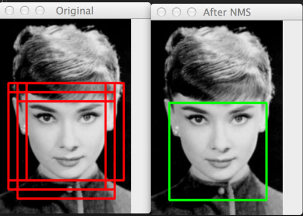
[NMS를 적용했을 때의 bounding box](https://www.pyimagesearch.com/2014/11/17/non-maximum-suppression-object-detection-python/)


YOLO의 목표는 grid에 포함되는 객체를 잘 잡아내는 것입니다. 즉 grid cell에 속하는 객체를 검출할 책임이 있는 거죠. 따라서 1개 grid에 귀속된 bbox 정보 (x, y, w, h)의 학습 목표는 bbox의 ground truth와 최대한 동일하도록 학습되는 것입니다. 학습 목표가 제대로 이루어졌는지를 확인하려면 객체 인식 모델의 성능 평가 도구인 IoU(Intersection over Union)를 사용하면 되겠죠?

- [IoU, Intersection over Union 개념을 이해하자](https://ballentain.tistory.com/12)

## YOLO의 네트워크 구조
---
YOLO의 네트워크 구조는 아래 그림과 같이 24개의 Conv 레이어와 2개의 Fully connected 레이어로 이루어져 있습니다.

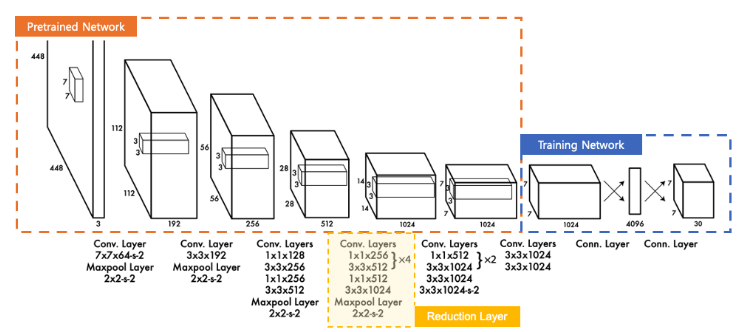
[YOLO Architecture](https://medium.com/curg/you-only-look-once-%EB%8B%A4-%EB%8B%A8%EC%A7%80-%ED%95%9C-%EB%B2%88%EB%A7%8C-%EB%B3%B4%EC%95%98%EC%9D%84-%EB%BF%90%EC%9D%B4%EB%9D%BC%EA%B5%AC-bddc8e6238e2)


모델 구조의 앞부분(Pretrained)은 ImageNet의 1000개 클래스 데이터셋을 가지고 사전학습한 GoogLeNet 모델입니다. 사전학습을 위해 20개의 Conv 레이어와 average pooling 레이어와 fully-connected 레이어를 사용하였습니다. 그러나 GoogLeNet의 Inception 모듈 대신 1x1 reduction 레이어를 사용하여 연산량을 감소시켰습니다.

detection을 위해 사전학습된 모델에 4개의 Conv 레이어와 2개의 FC 레이어를 추가하였고, PASCAL VOC 데이터셋으로 fine-tuning하였습니다. fine-grained 이미지를 얻기 위해 원래의 224 x 224 이미지의 2배인 448 x 448의 이미지를 사용했다고 합니다.

마지막 레이어는 Class 확률와 bbox 좌표를 학습하고 예측하여 S x S x (B * 5 + C) 크기의 텐서로 예측값이 출력됩니다.

## YOLO의 Inference 과정
---


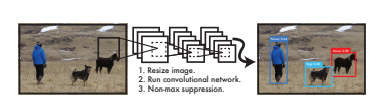
[The YOLO Detection System](https://arxiv.org/pdf/1506.02640.pdf)


Inference를 할 때는 조건부 클래스 확률 P(Class i ∣Object)를 각 box의 confidence 예측값과 곱해 각 box의 클래스별 confidence score(class-specific confidence score)를 얻을 수 있습니다. 각 score는 box의 클래스의 확률과 예측된 box가 사물을 얼마나 잘 예측하는지를 보여줍니다.

$P(Class_{i}|Object) * P(Object) * IoU_{pred}^{truth} = P(Class_{i}) * IoU_{pred}^{truth}$
 
이 과정을 모든 bbox에서 시행하면 한 이미지에서 예측한 클래스별 confidence score의 개수는 7 * 7 * 2 = 98개입니다. 이 98개의 클래스별 confidence score에 대해 20개의 class를 기준으로 NMS를 하여 object에 대한 class와 bounding box location을 결정할 수 있습니다.

# 19-6. YOLO (3) YOLO v1의 성능

## YOLO v1 의 loss 함수
---

YOLO의 loss는 bbox의 위치 예측과 관련된 localization loss와 클래스 예측과 관련된 classification loss가 있으며, 두 loss 모두 SSE(sum-squared error)를 기반으로 합니다. 그런데 SSE는 이 두 loss를 동일하게 가중치를 줍니다. 이런 상황은 이상적이 아니겠죠? 뿐만 아니라 이미지 내 대부분의 grid cell에 객체가 없을 경우가 일반적인데, 이런 경우에는 confidence score가 0에 가깝게 됩니다. 이는 모델의 불균형을 초래합니다.

이런 문제를 해결하기 위해 bbox의 좌표에 대한 loss를 증가시키고, 객체가 없는 box의 confidence 예측값의 loss는 감소시켰습니다. 이를 위해 
$λ_{coord}$ 와 $λ_{noobj}$라는 두 개의 하이퍼파라미터를 사용했습니다.

뿐만 아니라 SSE는 큰 bbox와 작은 bbox의 loss를 모두 동일한 가중치로 계산합니다. 그러나 작은 bbox가 큰 bbox보다 조그마한 위치 변화에도 더 민감하죠. 이를 개선하기 위해 bbox의 너비와 높이에 square root를 취해주었습니다.

YOLO의 loss 함수는 아래와 같습니다.


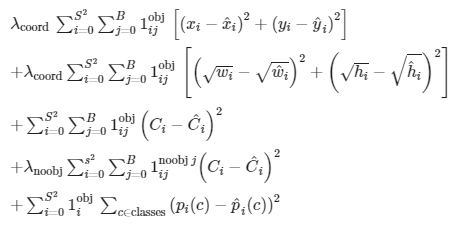

- $1_{i}^{obj}$  는 grid cell i 안에 객체가 있는지 여부를 나타냅니다. 객체가 grid cell 안에 존재하면 1, 없으면 0을 출력합니다.


- $1_{ij}^{obj}$ 는 객체가 존재하는 grid cell i의 j번째 bbox predictor이고, i번째 cell에 객체가 있고, j번째 predictor의 값이 다른 predictor보다 높으면 1, 그렇지 않으면 0으로 출력합니다.


- $1_{ij}^{noobj}$ 는 객체가 존재하지 않는 grid cell의 j번째 bbox predictior를 의미합니다.


loss 함수를 하나씩 살펴보면 아래와 같습니다.

- 첫번째 항 ~ 세번째 항: 객체가 존재하는 grid cell i의 bbox predictor j에 대해
    - 첫번째 항: x와 y의 loss 계산
    - 두번째 항: 너비와 높이의 loss 계산(제곱근을 취한 SSE)
    - 세번째 항: confidence score의 loss 계산
    
    
- 네번째 항: 객체가 존재하지 않는 grid cell i의 bbox predictor j에 대해 confidence score의 loss 계산(객체가 없을 때의 패널티)


- 다섯번째 항: 객체가 존재하는 grid cell i에 대해 조건부 클래스 확률의 loss 계산

**Q. YOLO v1의 loss function은 어떻게 구성되어 있나요?**

A.  
이미지의 각 grid 셀에 물체가 존재하지 않는 지에 대해 0과 1로 나타내주는 objectness score 부분과
bbox의 위치 예측과 관련한 localization loss, 클래스 예측과 관련된 classification loss로 구성되어 있습니다😎

---

YOLO v1의 손실 함수(Loss Function)는 객체 감지 태스크의 여러 요소를 동시에 고려하도록 설계되었습니다. 이는 네트워크가 바운딩 박스의 위치, 객체의 클래스, 그리고 객체의 존재 여부를 정확하게 예측하도록 합니다. 다음은 YOLO v1의 손실 함수 구성 요소입니다:

1. **좌표 손실(Coordinate Loss)**: 바운딩 박스의 중심 좌표 \( (x, y) \)와 폭 및 높이 \( (w, h) \)에 대한 예측 오차를 측정합니다. 중심 좌표에 대해서는 제곱 오차를, 폭과 높이에 대해서는 제곱근 오차를 사용합니다. 이는 큰 박스와 작은 박스의 오차가 손실에 미치는 영향을 비슷하게 만들어 줍니다.


2. **신뢰도 손실(Confidence Loss)**: 객체가 있는 경우와 없는 경우에 대한 신뢰도(박스가 객체를 포함하는 확률과 그 객체의 실제 IoU)에 대한 손실입니다. 객체가 있는 경우의 신뢰도 손실과 없는 경우의 신뢰도 손실을 따로 계산하며, 객체가 없는 경우의 신뢰도 손실에는 낮은 가중치를 둡니다.


3. **분류 손실(Classification Loss)**: 객체가 있는 그리드 셀에 대해, 실제 클래스 라벨과 예측된 클래스 확률 간의 오차를 측정합니다. 이는 일반적으로 각 클래스에 대한 제곱 오차의 합으로 계산됩니다.


손실 함수 전체는 아래와 같은 요소들의 가중 합으로 구성됩니다:

- \( \lambda_{\text{coord}} \)는 좌표 손실에 대한 가중치입니다.


- 각 그리드 셀 \( i \)와 각 바운딩 박스 \( j \)에 대해, \( 1_{ij}^{\text{obj}} \)는 실제 객체가 박스 \( j \)에 의해 감지된 그리드 셀 \( i \)에 있을 때 1, 아니면 0입니다.


- \( 1_{ij}^{\text{noobj}} \)는 실제 객체가 박스 \( j \)에 의해 감지된 그리드 셀 \( i \)에 없을 때 1, 아니면 0입니다.


- \( (x, y, w, h) \)는 예측된 박스의 좌표와 크기, \( (\hat{x}, \hat{y}, \hat{w}, \hat{h}) \)는 실제 박스의 좌표와 크기입니다.


- \( C_i \)는 그리드 셀 \( i \)에 객체가 있을 예측된 신뢰도, \( \hat{C}_i \)는 실제 신뢰도입니다.


- \( p_i(c) \)는 클래스 \( c \)에 대한 예측된 확률, \( \hat{p}_i(c) \)는 실제 확률입니다.


이러한 다양한 요소를 포함하는 손실 함수는 YOLO가 객체의 위치와 크기, 그리고 클래스를 동시에 예측하는 데 있어 중요한 역할을 합니다.

## YOLO의 성능
---
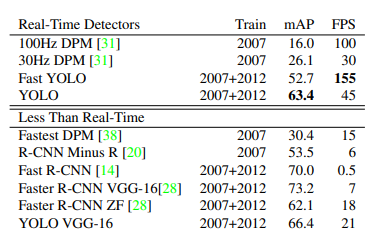
[Real-Time Systems on PASCAL VOC 2007](https://arxiv.org/pdf/1506.02640.pdf)



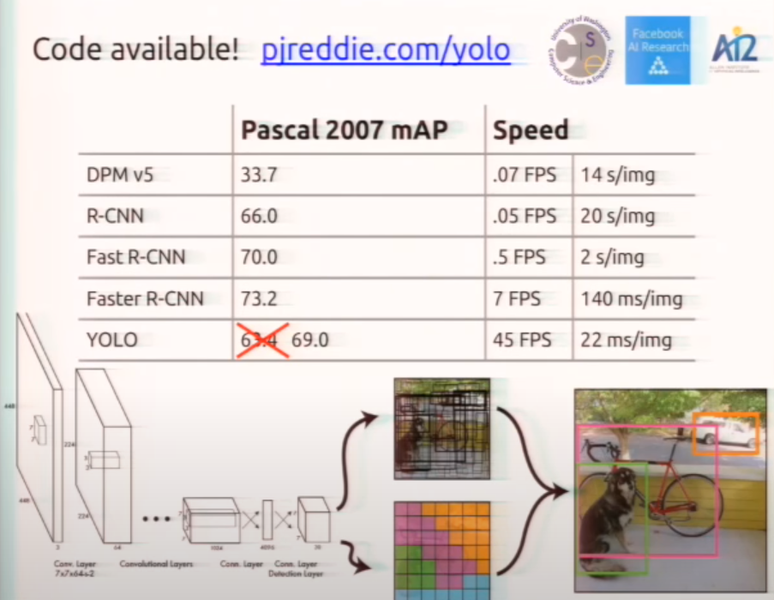
https://www.youtube.com/watch?v=NM6lrxy0bxs&t=142s


arXiv 논문 발표에서는 mAP가 63.4였지만 CVPR 2016 발표때는 69.0으로 모델의 성능을 향상되어 발표되었습니다. 즉 YOLO v1은 Faster R-CNN과 성능에 큰 차이가 나지 않으면서 속도는 6배 이상인 혁신적인 연구였습니다.


## YOLO v1 의 단점
---

획기적이었던 YOLO v1에도 단점은 있었습니다. 우선 각각 grid cell이 2개의 box와 하나의 클래스만 예측 가능하므로 가까이에 있는 여러 개의 객체를 예측하기 어려웠습니다. 특히 새떼와 같이 그룹으로 나타나는 작은 object에 대해 예측을 제대로 하지 못했습니다.

또한 bbox의 형태가 training data를 통해 학습되었기 때문에 bbox 분산이 너무 넓어 새로운 형태의 bbox 예측이 잘 안되기도 했죠. 모델 구조상 backbone만 거친 feature map을 대상으로 bbox 정보를 예측하기 때문에 localization이 다소 부정확했습니다.

마지막으로 loss 함수가 작은 bbox와 큰 bbox의 loss를 같게 다루기 때문에 큰 box의 작은 loss보다 작은 box의 작은 loss가 IoU에 더 큰 영향을 미쳤습니다. 그래서 2017년 YOLO v2이 나오게 됩니다.

# 19-7. YOLO (4) YOLO v2

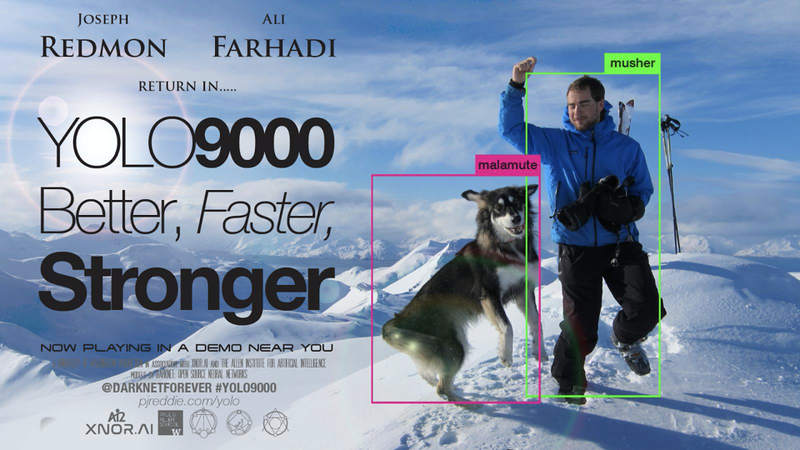
Object Detection에 혁신을 가져온 Redmon은 1년 뒤인 CVPR 2017에 YOLO를 v2로 발전시켜 가지고 나옵니다. 위의 이미지는 실제 발표 자료에 포함된 것이었습니다. 세상 힙함은 역시 빠질 수 없죠? 😜

Joseph Redmon의 발표자료에서 intro에서 YOLO 자체로 좋긴 좋았는데 정확도가 아쉬웠다고 언급합니다.

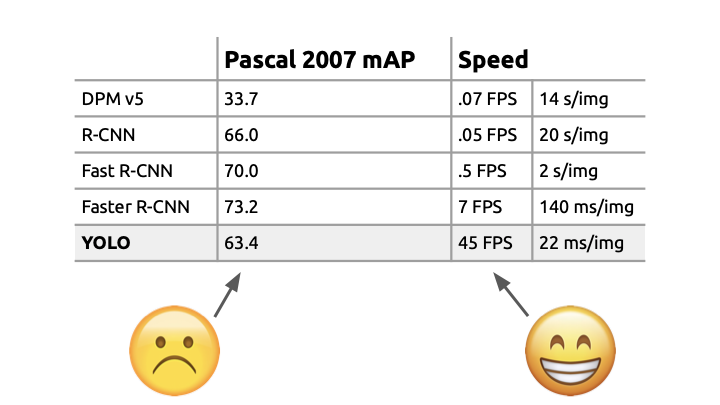
CVPR 2016에서의 데모 중에 Redmon이 잠깐 사라진 적이 있는데, YOLO가 뒷문을 화장실로 인식해버리는 사고였어요. Redmon은 CVPR 2017에서 이때 장면을 캡쳐해서 가지고 나왔습니다. 즉 YOLO의 정확도가 낮다는 것을 보여주는 한 예였죠. 이전 스텝에서 언급한 드라마 '스타트업'에서도 사람의 얼굴을 화장실로 인식했던 것 기억하시죠?

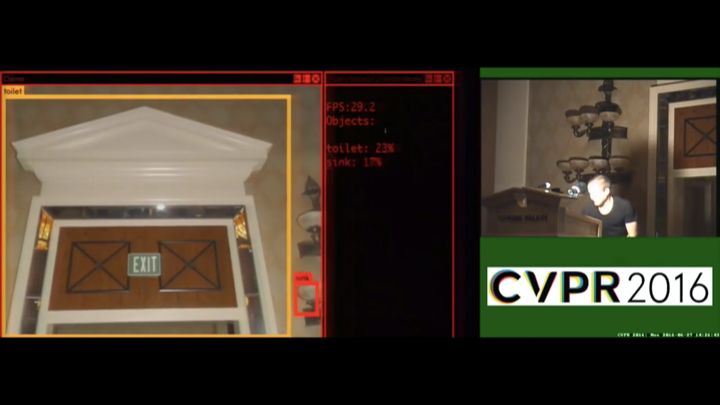

## YOLO v2 의 목적
---
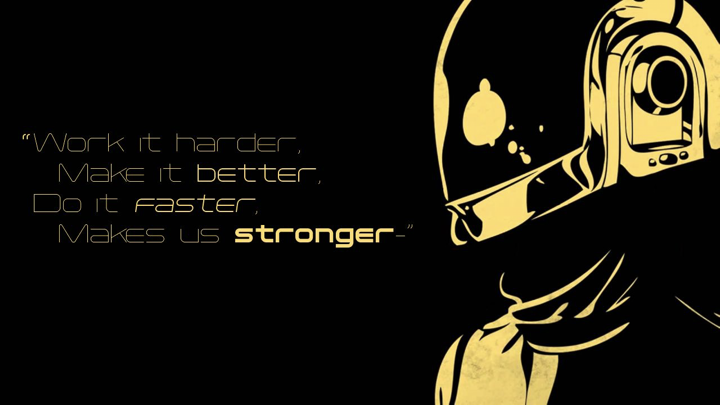


YOLO의 목적은 아래와 같습니다.

- Make it better
- Do it faster
- Makes us stronger


간단히 요약하자면 recall을 올리고 localization을 잘 해보자! 입니다.

- Make it better
---

Better는 정확도를 올리기 위한 방법입니다. YOLO v2에서는 이전 모델에서 낮은 성능으로 보였던 localization과 recall을 높이면서도 여전히 모델을 단순하게 만들고 속도도 빠르게 하려고 하였습니다.

이를 위해 Batch Normalization, High Resolution Classifier, Convolutional with Anchor boxes, Dimension Clusters, Direct location prediction, Fine-Grained Features, Multi-Scale Training 등의 방법을 사용하였습니다. 각 방법을 사용했을 때의 결과는 아래의 표로 정리되어 있습니다.

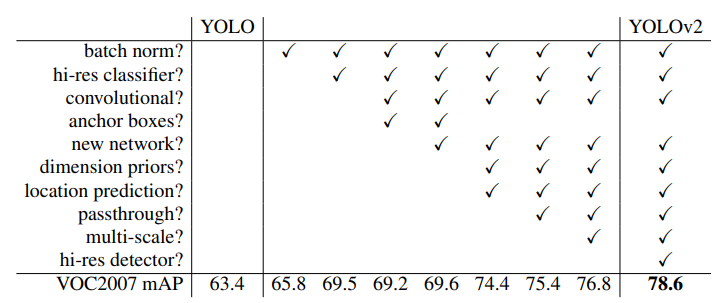
[A summary of results for design decisions](https://openaccess.thecvf.com/content_cvpr_2017/papers/Redmon_YOLO9000_Better_Faster_CVPR_2017_paper.pdf)

정확도를 높이기 위해 사용했던 각각의 방법을 간단히 정리하면 아래와 같습니다.

- Batch Normalization

모든 conv 레이어에 batch normalizaion을 사용하였고, dropout은 제거하였습니다. 이로써 mAP에서 2% 이상의 성능 개선을 하였습니다.

- High Resolution Classifier

YOLO v1에서 ImageNet의 224 x 224 이미지를 학습하고, detection에서 448 x 448 이미지를 사용했던 것과 달리 YOLO v2에서는 처음부터 448 x 448의 해상도로 학습하였습니다. 이로써 mAP에서 4% 정도의 성능 개선을 이루었습니다.

- Convolutional With Anchor Boxes

bounding box를 예측하기 위해 YOLO v1의 Fully connected 레이어를 제거한 후 Fully Convolutional Network를 사용하였고, anchor box들을 사용해 bounding box를 예측하였습니다.

또한 1개의 중앙점을 갖는 13 x 13(홀수 x 홀수)의 출력 feature map을 만들도록 입력 이미지의 크기를 448 x 448에서 416 x 416로 줄였습니다. 이는 대부분의 객체가 이미지의 중앙에 있는데, 중앙에 위치한 객체의 경우는 중앙점이 하나일 경우에 더 잘 예측할 것이라는 예상 때문이었습니다.

따라서 YOLO v2는 13 * 13 * 5개의 bounding box를 예측합니다.

그 결과 mAP는 69.5에서 69.2로 떨어지지만 recall은 81%에서 88%로 증가였습니다.

- Dimension Cluster

Fast R-CNN에서는 anchor box의 크기와 비율을 사전에 정해주고, 학습을 통해 세부 조정을 했습니다. 그러나.YOLO v2는 k-means clustering을 적용해 최적의 anchor box를 결정하였습니다.

하지만 유클리드 거리를 사용하는 일반적인 k-means clustering과 달리 IoU 개념을 distance metric으로 사용해 더 좋은 anchor box를 얻을 수 있었어요. 그 이유는 ground truth box와 유사한, 즉 IoU가 높은 anchor box를 찾기 위해서였습니다.

클러스터링 개수를 늘리면 정확도가 높아지지만 속도가 느려지므로 YOLO v2는 최종적으로 5개의 anchor box를 사용했습니다.



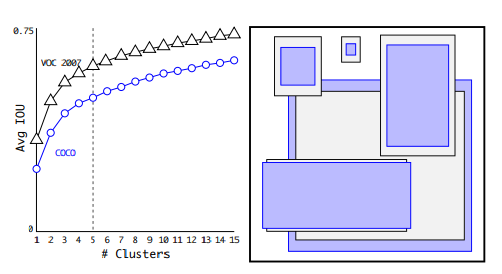
[Clustering box dimensions on VOC and COCO](https://openaccess.thecvf.com/content_cvpr_2017/papers/Redmon_YOLO9000_Better_Faster_CVPR_2017_paper.pdf)

- Direct location prediction

YOLO v2는 결정한 anchor box에 따라서 하나의 셀에서 5차원의 벡터로 이루어진 bounding box를 아래와 같은 방식으로 조정하여 예측하였습니다. 학습 초반에 random initialization으로 인한 학습의 불안정을 예방하기 위해 bounding box가 grid cell을 벗어나지 않도록 제약을 둔거죠. 주의할 점은 YOLO v1이 grid cell의 중앙점을 예측하였다면 YOLO v2은 좌상단으로부터 얼마나 이동하였는지 예측한다는 것입니다.

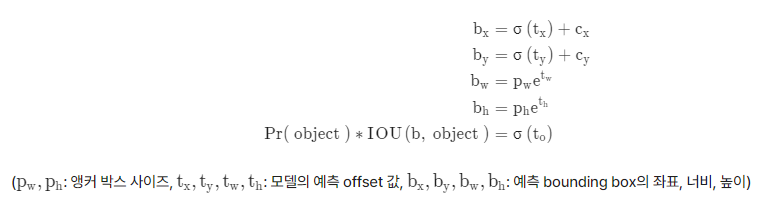

Dimension Cluster와 Direct location prediction를 사용해 약 5%의 성능 향상을 얻었습니다.

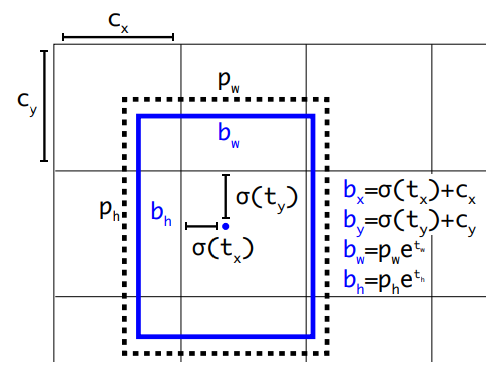
[Bounding boxes with dimension priors and location prediction.](https://openaccess.thecvf.com/content_cvpr_2017/papers/Redmon_YOLO9000_Better_Faster_CVPR_2017_paper.pdf)


- Fine-Grained Features

13 × 13의 feature map은 작은 물체 검출을 잘 하지 못한다는 단점이 있었기 때문에 YOLO v2는 passingthrough 레이어라는 것을 사용했습니다. passingthrough 레이어는 이전 레이어의 26 × 26 feature map과 13 × 13의 feature map을 concatenate합니다. 이렇게 하는 이유는 26 x 26의 feature map에 Fine-Grained Features(고해상도 피처)가 담겨 있기 때문입니다.

그러나 두 feature map의 크기가 다르기 때문에 26 × 26 × 512 feature map을 13 × 13 × 2048 feature map으로 변환한 후 concatenate하였습니다.

이로써 약 1%의 성능 향상을 보였습니다.

- Multi-Scale Training

모델이 다양한 입력 사이즈에도 예측을 잘 할 수 있도록 매 10개의 batch마다 입력 이미지의 크기를 바꿔가면서 모델 학습을 하였습니다. 모델이 32 간격으로 downsample 되므로 입력 이미지는 32의 배수가 될 수 있습니다. 그래서 입력 이미지의 크기는 {320, 352, ... 608} 중 하나가 사용됩니다.

Do it faster

---


faster는 detection 속도를 향상시키기 위한 방법이었습니다.

- Darknet-19

YOLO v2에서는 Fully Connected 레이어를 제거하고 global average pooling을 하여 가중치 파라미터 수를 크게 줄였습니다. 이렇게 해서 만든 최종 모델은 Darknet-19이라고 불리는데, 19개의 convolutional 레이어와 5개의 maxpooling 레이어로 이루어져 있습니다.

DarkNet-19를 통과한 YOLO v2의 최종 출력은 13 x 13 x 125이에요. 위에서 feature map이 13 x 13이라고 하였고, 5개의 bounding box를 예측하기 때문에 5 * (5 + 20)이므로 13 x 13 x 125이 됩니다. 이전 스텝에서 하나의 bounding box가 x, y, w, h, confidence를 예측하고, 클래스의 개수가 20개라고 했던 것 기억하시죠?

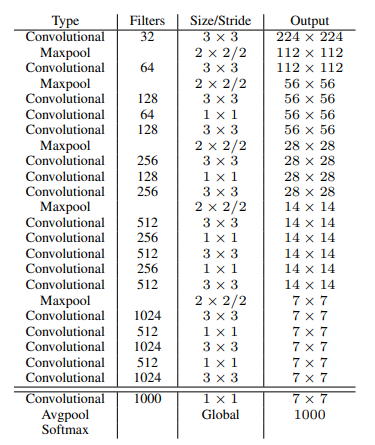
[Darknet-19](https://openaccess.thecvf.com/content_cvpr_2017/papers/Redmon_YOLO9000_Better_Faster_CVPR_2017_paper.pdf)


Makes us stronger

---

stronger는 더 많은 범위의 class를 예측하기 위한 방법이었습니다. YOLO v1는 PASCAL VOC 데이터셋에서 제공되는 20개의 클래스를 기준으로 학습해서 20개의 클래스만 detection하였습니다. 그러나 YOLO v2에서는 9천개의 클래스에서 detection할 수 있도록 하고, 그 모델을 YOLO9000이라고 불렀습니다. 그래서인지 YOLO v2는 [YOLO9000: Better, Faster, Stronger](https://openaccess.thecvf.com/content_cvpr_2017/papers/Redmon_YOLO9000_Better_Faster_CVPR_2017_paper.pdf)이라는 논문 이름으로 발표되었죠.

YOLO 9000은 YOLO v2와 모델 구조가 같고 detection하는 라벨을 늘렸기 때문에 자세히 설명하지는 않겠습니다. 간단히 설명하자면 9천개의 클래스에 대해 분류를 하기 위해 계층적으로 분류 작업(Hierachical Classification)을 수행하여 기존의 WordNet 기반의 데이터를 트리 구조인 WordTree를 생성하였습니다.

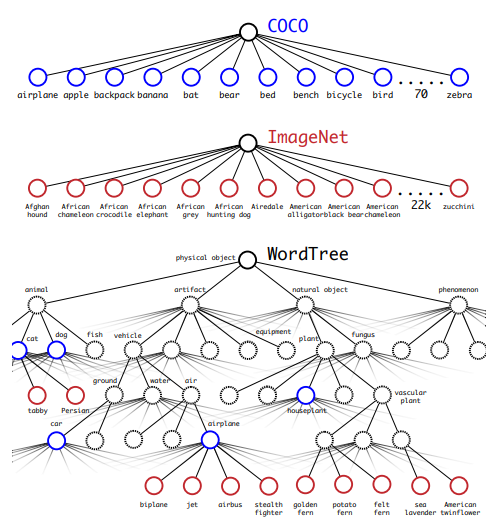
[WordTree](https://openaccess.thecvf.com/content_cvpr_2017/papers/Redmon_YOLO9000_Better_Faster_CVPR_2017_paper.pdf)


ImageNet + COCO 데이터셋 + ImageNet Detection을 합쳐 9천개의 클래스 라벨을 생성했습니다. 그 후 Detection과 Classification을 합쳐서 학습을 하는데, Detection 데이터셋과 Classification 데이터셋의 개수가 차이가 크기 때문에 oversampling하여 Detection과 Classification 비율을 4:1로 맞췄습니다. Detection 데이터셋은 classification과 bbox에 대한 loss를 역전파하였지만 Classification 데이터셋은 classfication loss만 역전파하여 학습하였습니다. 이로 인해 9천개의 클래스를 detection할 수 있었죠. 이에 대한 자세한 내용은 논문을 통해 알아보시기 바랍니다.

**Q. YOLO v1과 비교했을 때, YOLO v2에서 달라진 점은 무엇이 있었나요?**

A.  
속도개선을 위해 기존의 Darknet에서 Darknet-19로 모델 변경,
성능향상을 위해 모든 Conv layer에 Batch Normalization 사용 / bbox 예측을 위해 Fully Convolutional Network 사용 및 여러 개의 anchor box를 사용 / bbox가 grid cell을 벗어나지 않도록 제약을 두는 direct location prediction 등의 기법 활용,

그 외에 기존에 20개의 클래스만을 detection 할 수 있었던 YOLO v1이었지만, v2로 넘어오면서 9천 개의 클래스를 detection 할 수 있게 되었죠!

---

YOLO v1 대비 YOLO v2에서는 여러 가지 개선점과 변화가 있었습니다. 이러한 변화들은 YOLO v2를 더 정확하고 빠르며 신뢰할 수 있는 객체 감지 시스템으로 만드는 데 기여했습니다. 주요 달라진 점은 다음과 같습니다:

### 1. 배치 정규화(Batch Normalization)
- YOLO v2는 각 컨볼루션 층에 배치 정규화를 추가하여, 학습을 안정화시키고 일반화 성능을 향상시켰습니다. 이로 인해 모델의 정확도가 향상되고, 과적합을 줄일 수 있었습니다.

### 2. 해상도 변경
- YOLO v2는 높은 해상도(416x416)에서의 학습과 추론을 지원하여, 작은 객체의 감지 성능을 향상시켰습니다. YOLO v1은 일반적으로 448x448 해상도를 사용했었습니다.

### 3. 앵커 박스(Anchor Boxes)
- YOLO v2는 앵커 박스를 도입하여, 바운딩 박스의 위치 예측을 개선했습니다. 이는 모델이 학습 데이터셋의 객체 크기와 비율을 더 잘 이해하고, 초기 바운딩 박스 추정을 향상시키는 데 도움을 주었습니다.

### 4. Fine-Grained Features
- YOLO v2는 세밀한 특징을 포착하기 위해 패스스루(passthrough) 레이어를 사용하여, 이전 레이어의 특징을 결합했습니다. 이는 특히 작은 객체의 감지에 유용합니다.

### 5. 다양한 데이터셋에서의 학습
- YOLO v2는 WordTree를 사용하여 ImageNet 데이터셋으로 사전 학습한 후 COCO 데이터셋으로 파인 튜닝을 진행하는 등, 여러 데이터셋에서 학습하는 전략을 채택했습니다.

### 6. 멀티스케일 학습(Multi-Scale Training)
- YOLO v2는 다양한 크기의 입력 이미지를 사용하여 네트워크를 학습시켜, 다양한 크기의 객체에 더욱 강건하게 만들었습니다.

### 7. Darknet-19
- YOLO v2는 새로운 분류 네트워크인 Darknet-19를 기반으로 사용했습니다. 이는 19개의 컨볼루션 층과 5개의 맥스풀링 층으로 구성되어, 성능과 속도의 균형을 맞췄습니다.

### 8. 직관적인 클래스 예측
- YOLO v2는 클래스 예측을 개선하여 객체 감지 시 더 직관적이고 명확한 클래스 분류를 가능하게 했습니다.

### 9. 성능 향상
- 전반적으로 YOLO v2는 YOLO v1에 비해 mAP(mean Average Precision)와 FPS(Frames Per Second)에서 상당한 성능 향상을 보여주었습니다.

YOLO v2는 이러한 다양한 개선을 통해 YOLO v1의 한계를 극복하고, 객체 감지 분야에서 중요한 발전을 이루었습니다.

## YOLO v2 의 성능비교
---
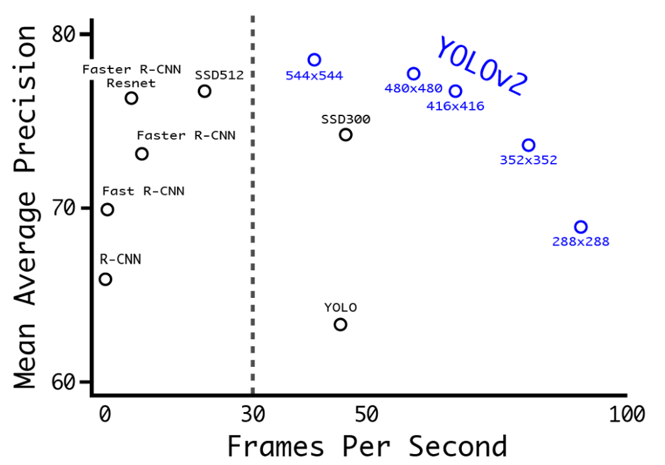
[YOLO v2 성능](https://medium.com/@akarshzingade/logo-detection-using-yolov2-8cda5a68740e)

YOLO v2의 성능은 위의 그래프에서도 볼 수 있듯이 mAP가 상승하고 FPS도 개선되었다는 것을 알 수 있습니다. 그러나 여전히 mAP와 FPS간의 trade-off가 존재하였죠.

YOLO v2 발표 당시 SSD, R-FCN 등이 이미 발표된 상황이었습니다. 특히 SSD와 YOLO는 같은 single stage 방법을 지향하고 있었기 때문에 경쟁 모델이 되었고, YOLO v2 입장에서는 SSD와의 성능 차이를 부각시키는게 중요한 과제였습니다.

아래는 TED의 YOLO v2의 데모영상입니다.

https://youtu.be/Cgxsv1riJhI

# 19-8. YOLO (5) YOLO v3

## RetinaNet의 도발
---

아래의 RetinaNet figure를 보시면 YOLO v2를 언급하면서 보통 figure에는 그려주지도 않는 신선함을 보여줍니다. "YOLO 이제 퇴물아니야?"라는 느낌을 풍기면서 말이죠. 😝

- 실제로 retinanet 성능이 YOLO v2보다 좋기도 했습니다.


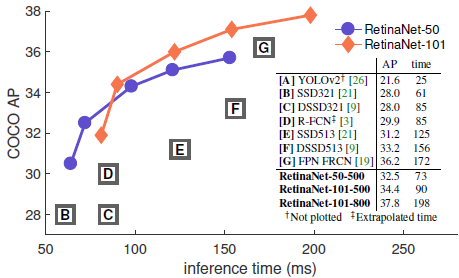
https://arxiv.org/pdf/1708.02002.pdf


하지만 역시 CV의 힙스터 Redmon은 새로운 YOLO를 들고 RetinaNet과 정면 비교하였습니다.

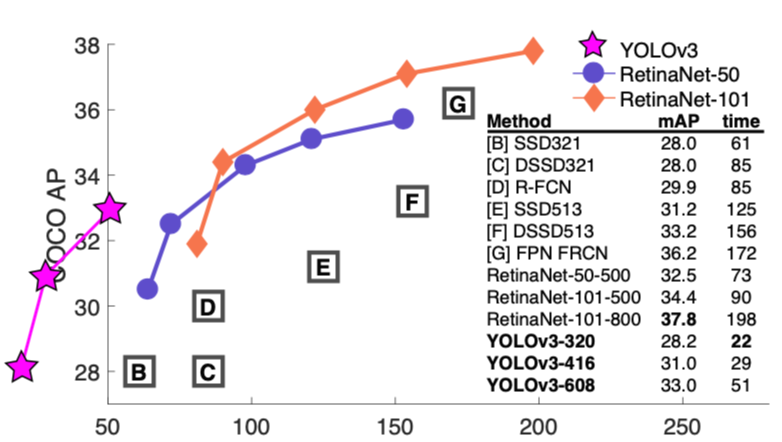
https://arxiv.org/pdf/1804.02767.pdf


RetinaNet figure를 그대로 가지고 와서 YOLO v3 성능을 박아 넣었죠.

- "graph 그릴 곳이 없어?? graph 바깥에 그리면 되잖아??"

해당 figure는 [YOLO 프로젝트 페이지](https://pjreddie.com/darknet/yolo/)에도 그대로 사용됩니다.


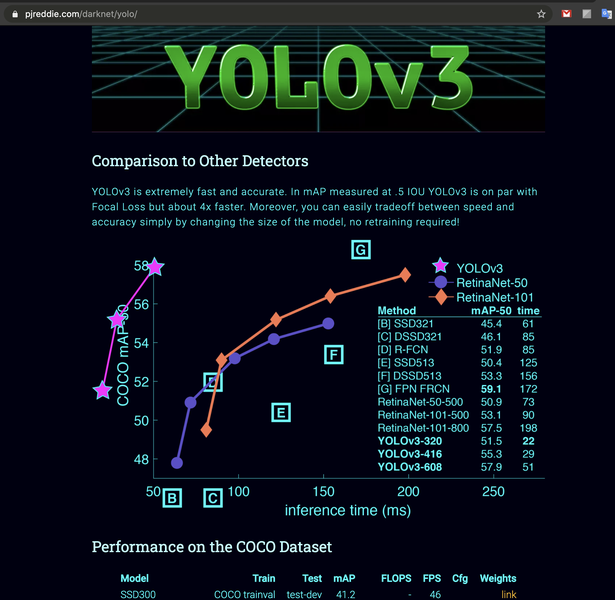
https://pjreddie.com/darknet/yolo/

## YOLO v3 원리
---

YOLO v3는 YOLO v2보다는 속도는 조금 느리지만 정확도를 개선한 모델입니다. 특히 YOLO의 약점이었던 작은 물체를 detection할 때 성능을 개선하였죠.

YOLO v3는 [YOLOv3: An Incremental Improvement](https://arxiv.org/abs/1804.02767)라는 이름의 논문에 소개되었습니다. 그러나 엄밀히 말하면 논문이라기보다 Tech Report인데, 이전의 YOLO 모델과의 차이점을 간략하게 소개한 보고서입니다.

사실 YOLO v3는 YOLO v2에서 약간의 변화만 추가한 모델입니다. 따라서 YOLO v3의 원리는 YOLO v2와의 차이점을 중심으로 설명하겠습니다.

- Bounding Box Prediction

Bounding Box Prediction은 YOLO v2와는 거의 차이가 없습니다. 그러나 각각의 bounding box마다 objectness score, 즉 bounding box에 물체가 있는지를 예측하는 점수를 logistic regression을 사용해 예측하였습니다. anchor box와 ground truth box의 IoU가 가장 높은 박스의 objectness score는 1로 두고 나머지는 무시하였습니다. 또한 Faster R-CNN 등의 다른 모델과 달리 각각의 ground truth에 대해 1개의 bounding box만 가지게 된다는 차이가 있었습니다.

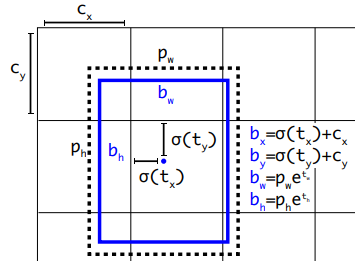
[Bounding box](https://arxiv.org/pdf/1804.02767.pdf)

- Class prediction

YOLO v3는 하나의 이미지에 다양한 label을 붙일 수 있는 multilabel classification를 하였습니다. 예를 들어 여성의 이미지에 person과 woman이라는 두 가지의 label을 붙일 수 있는 것을 의미합니다. 이를 위해 여러 개 중 하나만 찾는 softmax classifier가 아닌 해당 label이 맞는지 아닌지를 판단하는 logistic classifier를 사용하였고, binary cross entropy를 사용해 loss를 계산하였습니다.

- Predictions Across Scales

YOLO v3은 3개의 scale로 bouding box를 예측하였고, 각 scale당 3개의 bouding box를 예측하였습니다. 따라서 총 9개의 bouding box가 나오게 되며, 텐서는 N × N × [3 ∗ (4 + 1 + 80)]입니다. 여기서 3은 anchor box의 수이고, 4는 bounding box의 좌표, 너비, 높이이며, 1은 objectness score, 그리고 80의 클래스의 수입니다.

또한 feature map을 2배씩 upsampling함(13, 26, 52)으로써 더 의미 있는 semantic information을 얻고, 이전 feature map과 concatenate하여 보다 fine-grained한 정보를 얻을 수 있었다고 합니다.

- DarkNet-53

성능을 높이기 위해 YOLO v3은 53개의 레이어를 사용하였습니다. YOLO v2의 아키텍처였던 DarkNet-19에 residual network를 넣어 레이어를 53개까지 쌓을 수 있었습니다.

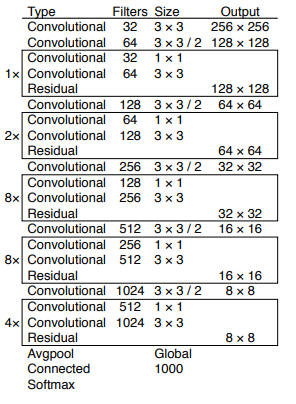
[DarkNet-53]
https://arxiv.org/pdf/1804.02767.pdf

DarkNet-53은 DarkNet-19보다 정확도가 높았고, ResNet-101이나 ResNet152과 성능이 비슷하지만 연산면에서 효율적이었습니다.

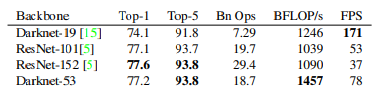
[성능과 연산량 비교]
https://arxiv.org/pdf/1804.02767.pdf


전체 모델 구조는 아래의 이미지로 나타낼 수 있습니다. 입력 이미지를 DarkNet-53에 통과시켜서 downsampling하면서 feature map을 추출합니다. 이 feature map을 토대로 detection을 하고, upsampling 후 다시 detection하고 다시 upsampling을 한 후에 detection하게 됩니다. 즉 3개의 scale된 bounding box를 이용한 detection을 함으로써 여러 개의 label에 대해서도 classification을 할 수 있었습니다.

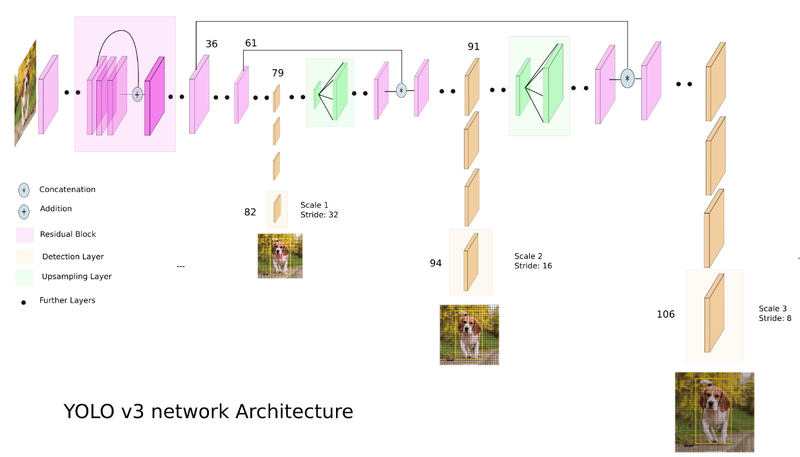
[YOLO v3의 구조]
https://towardsdatascience.com/yolo-v3-object-detection-53fb7d3bfe6b

**Q. YOLO v2와 비교하여 YOLO v3의 모델 부분에서는 어떠한 점이 달라졌나요?**

- YOLO v3에서는 DarkNet-53을 사용하여 기존의 아키텍처였던 DarkNet-19에 residual network를 추가해 layer를 53개까지 쌓을 수 있었습니다. 이를 통해 정확도를 높였고, 기존 ResNet 컨셉과 비슷한 성능을 보이지만 연산면에서 효율적인 모습을 보여주었습니다.

---

YOLO v3는 YOLO v2 대비 여러 면에서 발전된 기능과 구조를 제공했습니다. 주요 변경 사항은 다음과 같습니다:

### 1. 새로운 네트워크 구조 (Darknet-53)
- YOLO v3는 더 깊고 강력한 Darknet-53을 기반으로 합니다. 이 네트워크는 53개의 컨볼루션 층으로 구성되어 있으며, 이전 모델들보다 더 많은 레이어를 가지고 있습니다. Darknet-53은 ResNet과 유사한 잔차 연결(residual connections)을 사용하여 깊은 네트워크의 학습을 개선했습니다.

### 2. 멀티스케일 예측
- YOLO v3는 세 가지 다른 스케일에서 객체를 감지합니다. 이를 통해 다양한 크기의 객체에 대해 더 나은 성능을 제공하며, 특히 작은 객체의 감지 능력이 개선되었습니다.

### 3. 로지스틱 분류기(Logistic Classifiers)
- YOLO v3는 각 바운딩 박스 별로 다중 라벨 분류를 수행합니다. 이는 독립적인 로지스틱 분류기를 사용하여 각 클래스에 대한 예측을 수행하며, 이전 버전에서 사용된 소프트맥스 대신 독립적인 시그모이드 함수를 적용합니다.

### 4. 새로운 손실 함수
- YOLO v3는 바운딩 박스의 좌표를 예측할 때 평균 제곱 오차 대신에 바이너리 크로스-엔트로피 손실을 사용합니다.

### 5. 클래스 예측의 변화
- YOLO v3는 객체 감지 시 클래스 예측을 더욱 개선하여, 클래스 불균형 문제를 해결하고 성능을 향상시킵니다.

### 6. 성능 향상
- YOLO v3는 전반적인 정확도와 속도 면에서 YOLO v2보다 향상된 성능을 제공합니다.

### 7. 앵커 박스
- YOLO v3는 k-means 클러스터링을 사용하여 앵커 박스의 차원을 결정하며, 이전 버전보다 더 다양한 형태의 앵커 박스를 사용합니다.

이러한 개선점들을 통해 YOLO v3는 더 넓은 범위의 객체를 더 정확하게 감지할 수 있게 되었으며, 특히 작은 객체와 다양한 크기의 객체에 대한 감지 성능이 크게 향상되었습니다.

# 19-9. YOLO v3 그 이후

Redmon은 Computer Vision 연구가 자신의 목적과는 다르게 군사적으로 사용되고 있는 것에 큰 회의감을 느끼고 CV 연구를 그만두겠다고 선언합니다. YOLO 등 DarkNet 프로젝트는 Alexey Bochkovskiy가 메인테이너로 이어 받게되죠. 그 이후에도 다양한 사람들에 의해 YOLO를 이용한 다양한 모델이 나왔습니다.

## YOLO v4
---
Redmon이 빠진 후 Alexey Bochkovskiy가 2020년 4월에 [YOLO v4](https://arxiv.org/pdf/2004.10934.pdf)를 발표하였습니다. 아래 그림과 같이 YOLO v3보다 AP와 FPS가 각각 10%, 12% 증가된 것을 볼 수 있죠.

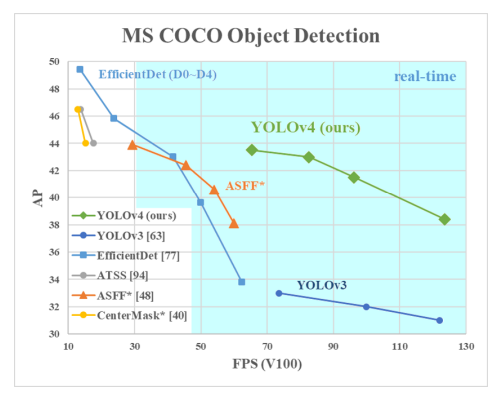
[YOLO v4의 성능](https://arxiv.org/pdf/2004.10934.pdf)


YOLO v4을 간단히 설명하자면 YOLO v3에 다양한 기법을 사용해 하나의 GPU(1080 Ti 또는 2080 Ti)로 object detection을 실시간으로 할 수 있도록 만든 모델입니다. 논문에서도 다양한 기법을 소개하고, 그 기법들을 실험한 결과를 정리하여 YOLO v4라는 모델을 만들어 냈습니다. 따라서 YOLO v4를 아래와 같이 나타낼 수 있습니다. 백본으로는 CSPDarknet53을 사용하였고, Neck(feature map 정제 및 재구성)으로는 SPP와 PAN, Head(object classification, localization)에서는 YOLO v3를 사용한 거죠.

YOLO v4 = YOLO v3+ CSPDarknet53 + SPP + PAN(Path Aggregation Network) + BoF(Bag of Freebies) + Bos(Bag of Specials)

참고로 Bag of Freebies는 Inference cost의 변화 없이 성능을 향상시키는 방법으로 전처리 또는 학습 단계에서 사용됩니다. Data Augmentation, Regularization, Loss Function 등이 이 기법에 속합니다. Bag of Specials는 inference cost가 조금 상승하면서 성능을 향상시키는 방법으로, Inference 단계나 후처리 단계에서 사용됩니다. Enhance Receptive field, Feature Integration, Activation function, Attention Module, Normalization, Post Processing 등이 해당됩니다.

각각의 자세한 내용은 논문 [YOLOv4: Optimal Speed and Accuracy of Object Detection](https://arxiv.org/pdf/2004.10934.pdf)을 참고해 보세요.

## YOLO v5
---
YOLO v5는 2020년 6월에 YOLO v3을 PyTorch로 구현한 Glenn Jocher에 의해 발표되었습니다. 하지만 YOLO v5는 처음으로 논문과 함께 발표되지 않은 최초의 모델이자, DarkNet이 아닌 PyTorch로의 구현이므로 기존의 YOLO 모델과 많이 다르다는 이유로, YOLO v5라는 이름에 대해 논란이 있었던 모델입니다. YOLO v5의 코드는 Ultralytics LLC라는 회사의 [깃헙](https://github.com/ultralytics/yolov5)에 공개되어 있습니다.

YOLO v4와 성능은 비슷하지만 용량이 훨씬 작고 속도도 빠릅니다.


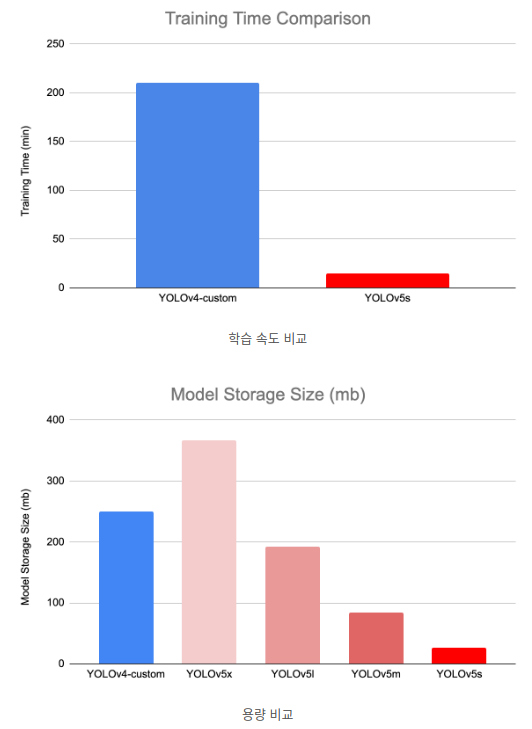
https://yong0810.tistory.com/30


YOLO v5는 OLOv5s, YOLOv5m, YOLOv5l, YOLOv5x라는 이름의 4가지 버전이 있습니다. 각각 small, medium, large, xlarge로, 백본이나 head는 동일하지만 모델 깊이와 레이어의 채널 수가 다릅니다. YOLOv5s는 (0.33, 0.50), YOLOv5m은 (0.67, 0.75), YOLOv5l은 (1.0, 1.0), YOLOv5x는 (1.33, 1.25)의 비율이며, 그에 따른 성능은 아래와 같이 s가 가장 빠르고, 정확도는 x가 가장 높습니다.

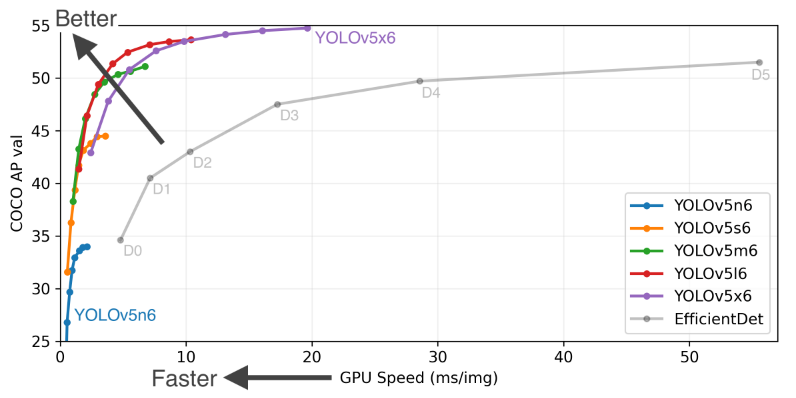
[YOLO v5 모델 별 성능 비교]
https://github.com/ultralytics/yolov5


YOLO v5는 YOLO v4의 백본과 유사하게 CSP-Darknet을 사용하고, YOLO v3과 동일하게 3가지 scale에서 bounding box를 각각 3개씩 찾습니다. YOLO v5의 아키텍처에 대한 자세한 설명은 아래의 블로그를 참고하세요.

- [YOLO V5 환경 셋팅 및 모델 아키텍쳐 분석하기](https://ropiens.tistory.com/44)

## PPYOLO
---
PPYOLO는 2020년 8월에 바이두에서 발표된 모델로, PP라는 것은 바이두에서 만든 오픈 소스 딥러닝 전용 프레임워크 PaddlePaddle의 약자입니다. 즉 PPYOLO는 PaddlePaddle을 이용해 구현한 YOLO 계열의 모델입니다. PPYOLO를 소개한 논문 [PP-YOLO: An Effective and Efficient Implementation of Object Detector](https://arxiv.org/pdf/2007.12099.pdf)은 YOLO v4와 비슷하게, 좋다고 알려진 다양한 기법을 사용해 YOLO v3의 성능을 올린 과정을 소개한 논문이죠.

그러나 YOLO v4와 달리 백본 네트워크, Data augmentation, NAS 등은 사용하지 않았는데, 그 이유는 일반적인 방법을 사용해 YOLO v3의 성능을 올리기 위해서라고 합니다. 만약 YOLO v4에서 사용한 기법을 사용하면 PPYOLO의 성능은 더 좋아질 것이라고 하네요.

PPYOLO의 기본 구조는 YOLO v3와 거의 동일합니다. 다만 다른 것은 백본을 DarkNet-53 대신 ResNet50-vd를 사용한 것과 Inject Points 3가지가 추가로 적용된다는 것입니다.

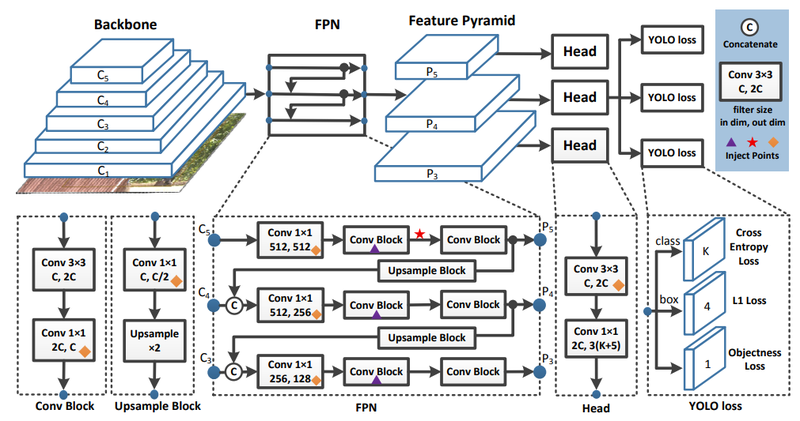
[PPYOLO의 아키텍처](https://arxiv.org/pdf/2007.12099.pdf)


PPYOLO에서는 YOLO v4와 비슷하게 Larger Batch Size, EMA, DropBlock Regularization, SPP 등 다양한 방법을 사용해 실험을 하였는데요, 자세한 내용은 논문을 참고해 보세요.

PPYOLO의 성능은 YOLO v4보다 정확도와 속도가 높습니다.

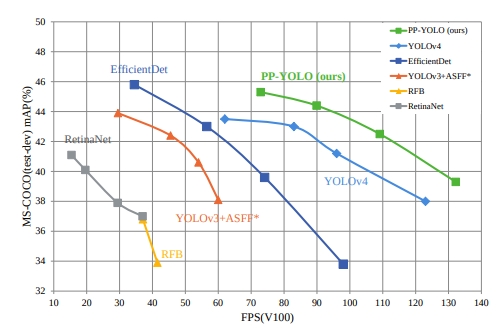
[PPYOLO 성능](https://arxiv.org/pdf/2007.12099.pdf)

## Scaled YOLO v4
---

2020년 11월, YOLO v4에 scaling 기술을 적용한 Scaled YOLO v4가 공개되었습니다. Scaled YOLO v4는 다양한 디바이스 환경에서 실시간으로 객체를 탐색하면서도 높은 정확도를 갖출 수 있도록 모델에 scaling 기술을 YOLO v4에 적용하였는데요, YOLO v4 -> YOLOv4-CSP-> Scaled YOLO v4의 순서로 모델을 만들었다고 합니다. YOLO v4에 CSP를 적용한 이유는 기존 모델에 [CSPNet](https://arxiv.org/pdf/1911.11929.pdf)을 적용하면 FLOPs(FLoating point Operations Per Second)을 현저히 줄일 수 있기 때문이었습니다. 또한 모델의 scaling의 상한과 하한을 정해 YOLOv4-large와 YOLOv4-tiny model을 만들었습니다.

아래의 그림은 YOLO v4-large의 아키텍처입니다. 먼저 CSP를 완전히 적용한 YOLOv4-P5를 디자인한 후, 이를 스케일링 업하여 -P6, -P7 버전을 만들었다고 하네요.

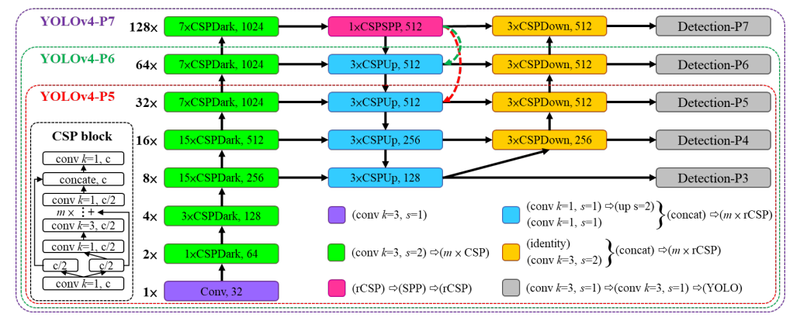
[YOLO v4-large의 아키텍처](https://arxiv.org/pdf/2011.08036.pdf)


Scaled YOLO v4는 발표 당시 기존의 object detection 분야에서 가장 좋은 성능을 가지고 있었습니다. Scaled YOLO v4에 대한 자세한 내용은 논문 [Scaled-YOLOv4: Scaling Cross Stage Partial Network](https://arxiv.org/pdf/2011.08036.pdf)을 참고하세요.


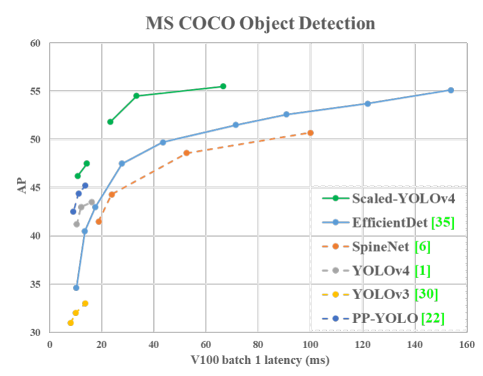
[Scaled YOLO v4 성능](https://arxiv.org/pdf/2011.08036.pdf)

## PPYOLO v2
---
2021년 4월 PPYOLO의 업그레이드된 모델인 PPYOLO v2가 공개되었습니다. PPYOLO v2의 성능과 정확도는 당시의 다른 모델보다 좋았다는 것을 아래의 그래프를 통해 알 수 있습니다.

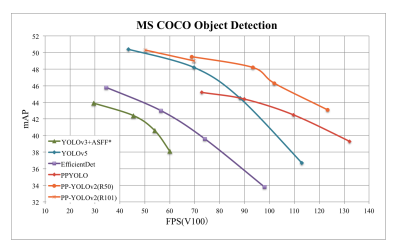
[PPYOLO v2 성능](https://arxiv.org/pdf/2007.12099.pdf)


PPYOLO v2는 PPYOLO의 성능을 향상시키기 위해 mish 활성화 함수와 Path Aggregating Network 등 다양한 실험을 했다고 하는데요, 자세한 내용은 논문 [PP-YOLOv2: A Practical Object Detector](https://arxiv.org/pdf/2104.10419.pdf)을 참고해 보세요.

## YOLOR
---

2021년 5월에 YOLOR이 논문 [You Only Learn One Representation: Unified Network for Multiple Tasks](https://arxiv.org/pdf/2105.04206.pdf)에서 소개되었습니다. YOLOR은 Scaled YOLO v4에서 파생된 모델로 같은 저자에 의해 쓰여졌습니다.

YOLOR은 사람이 학습할 때 명시적 지식(explicit knowlege)과 암묵적 지식(implicit knowlege)를 사용한다는 것에서 착안하여 만들어진 모델입니다. 참고로 명시적 지식은 말과 글로 표현할 수 있는 지식이고, 암묵적 지식은 문자나 언어가 아닌 경험이나 학습에 의해 체득된 지식입니다. YOLOR은 사람의 일반적인 학습 과정을 딥러닝에 적용하여 general representation을 생성하는 통합된 네트워크를 구성하였습니다. 이로써 YOLOR은 멀티 태스크를 잘 수행할 수 있었죠.

YOLOR의 아키텍처는 단순한데, YOLO v4 CSP 모델의 feature alignment, prediction refinement, multitask에 암묵적 지식을 아래와 같이 더해주는 것입니다. 암묵적 지식의 형태나 어떻게 모델에 적용되는지는 논문을 참고해 보세요.

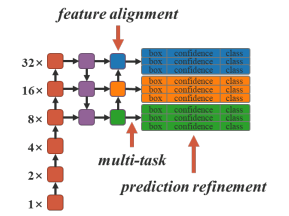
[YOLOR의 아키텍처](https://arxiv.org/pdf/2105.04206.pdf)

## YOLOX
---

2021년 8월에 나온 [YOLOX: Exceeding YOLO Series in 2021](https://arxiv.org/pdf/2107.08430.pdf)는 Anchor-Free Detector, Advanced Label Assignment Strategy, End-to-end Detector 등의 최신 연구를 적용하여 YOLO v3 SPP의 성능을 개선하였습니다.

아래 그림은 베이스라인으로 사용한 YOLO v3과의 차이를 나타내고 있는데요, YOLOX는 특히 Decoupled Head, Strong Data Augmentation, Anchor-Free, Multi-positives를 통해 성능 향상을 꾀하고 있습니다. Decoupled Head는 prediction하고자 하는 값에 따라 Head를 나누어 학습 속도를 빠르게 했고, Detector를 End-to-End 방식으로 만들 수 있었습니다.

Anchor-Free는 ground truth box 와 생성된 bounding box 안의 cell이 겹쳐 있으면 positive, 아니면 negative로 지정하여 detection을 수행합니다. 이로 인해 연산량을 낮추고, 일반화를 시킬 수 있으며 class imbalance 문제도 해결하고, 정확도를 높일 수 있다고 하네요.

그러나 Anchor-Free 방식만으로는 Anchor 메커니즘의 정확도를 따라잡을 수 없었기 때문에 Multi-positives를 사용하였습니다. Multi-positives는 각 객체의 중심과 주변에 해당하는 cell을 positive로 할당하여 예측을 하는 방법으로, 낮은 loss를 가진 k개의 cell만 학습에 참여시키는 simOTA과 함께 사용하여 정확도를 향상시켰습니다. YOLOX에 대해 더 자세한 내용은 논문을 참고해 보세요.

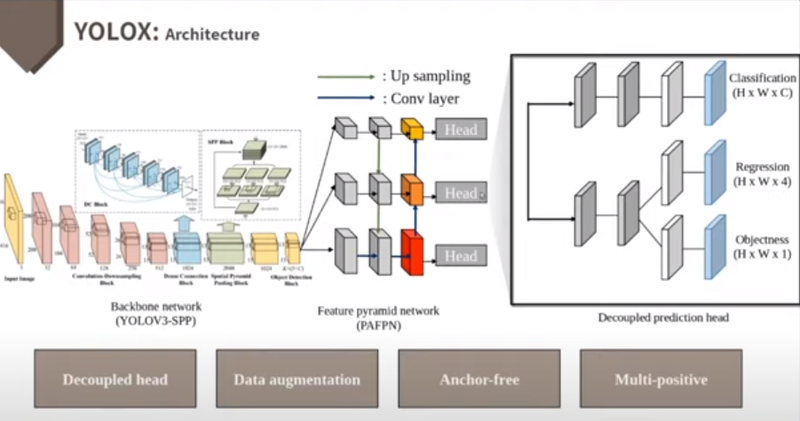
[YOLOX의 아키텍처](https://www.youtube.com/watch?v=N2rLSzEqqI8)


## YOLOS
---

NLP 분야에서 큰 영향을 끼치고 있는 Transformer는 CV에서도 점차 영향력을 키우고 있습니다. 이런 흐름에 맞춰 2021년 10월 [You Only Look at One Sequence: Rethinking Transformer in Vision through Object Detection](https://arxiv.org/pdf/2106.00666.pdf)라는 논문에서 YOLOS라는 모델이 소개되었습니다. 즉 YOLOS는 Transformer Encoder와 NLP Heads만을 사용해 2D object detection을 수행한 모델입니다.

YOLOS의 성능은 최근에 나온 다른 YOLO 게열의 모델과 비교했을 때 아주 좋지는 않은데요, YOLO v3이나 RetinaNet와 비슷한 정도의 성능을 보이고 있습니다. 하지만 Transformer를 object detection에 적용했다는 점에서 주목해볼만 하죠?

아래의 그림은 YOLOS의 모델 구조입니다. 간단히 설명하자면 YOLOS는 Transformer와 DETR의 Bipartite Loss를 합친 모델입니다. 자세한 내용은 논문을 참고해 보세요.

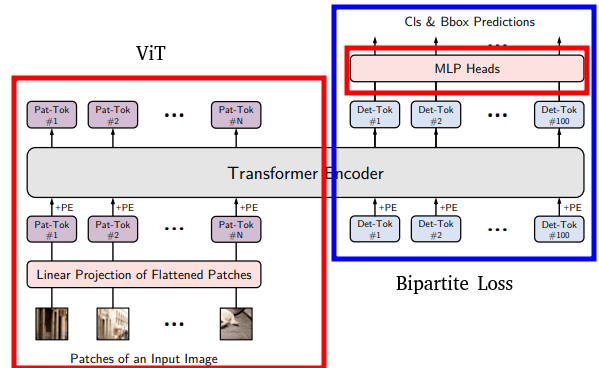
[YOLOS 아키텍처](https://arxiv.org/pdf/2106.00666.pdf)

# 19-10. SSD (1) SSD의 특징

## SSD : Single Shot MultiBox Detector
---

YOLO가 1 stage로 object detection을 할 수 있다는 증명을 한 뒤, 1 stage detector는 수많은 발전을 이루었습니다. SSD는 YOLO v1에서 grid를 사용해서 생기는 단점을 해결할 수 있는 아래와 같은 몇 가지 테크닉을 제안했죠.

- Pre-defined Anchor Box
- Image Pyramid

이제부터 SSD에 대한 자세한 내용을 논문 [SSD: Single Shot MultiBox Detector](https://arxiv.org/pdf/1512.02325.pdf)을 참고로 하여 설명해 보겠습니다.



## SSD의 Workflow
---
YOLO v1의 두번째 단점은 box 정보 (x, y, w, h)를 예측하기 위한 seed 정보가 없기 때문에 넓은 bbox 분포를 모두 학습할 수 없었다는 점입니다. 이로 인한 성능 손실이 존재할 수 있었죠. 따라서 Faster R-CNN 등 에서 사용하는 anchor를 적용할 필요가 있었습니다.

만약 개가 등장하는 bounding box가 존재한다면, 그 bounding box만의 x, y, w, h 특성이 존재하기 때문에 pre-defined된 box의 x, y, w, h를 refinement하는 layer를 추가하는 것이 이득이었습니다. 이 anchor box를 SSD에서는 Default box라고 부릅니다

## Image Pyramid
---

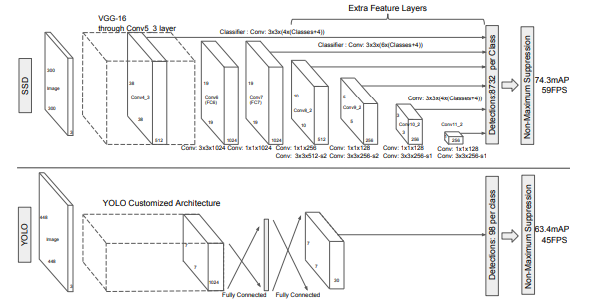
[SSD와 YOLO의 아키텍처 비교](https://arxiv.org/pdf/1512.02325.pdf)


Image Pyramid는 ImageNet으로 사전학습된 VGG16을 사용합니다. VGG에서 pooling layer를 거친 block은 하나의 image feature로 사용 가능합니다.

YOLO에서 7x7 크기의 feature map 하나만을 사용했다면, SSD는 38 x 38, 19 x 19, 10 x 10, 5 x 5, 3 x 3, 1 x 1인 다양한 크기의 feature map을 사용하였습니다. 각 feature map은 YOLO의 관점에서 보면 원본 이미지에서 grid 크기를 다르게 하는 효과가 있었습니다. 따라서 5 x 5 크기의 feature map에서 grid가 너무 커서 작은 물체를 못찾는 문제를 38 x 38 크기의 feature map에서 찾을 수 있는 단서를 마련하였습니다.

즉 SSD는 서로 다른 크기의 feature map에서 object detection을 해서 작은 물체는 큰 feature map에서, 큰 물체는 작은 feature map에서 찾을 수 있게 한 거죠. 각 단계에서 추출된 feature map은 detector와 classifier를 통과해 object detection을 합니다.

각 feature map에는 bounding box와 클래스 정보가 담겨 있는데, 이 feature map들을 2번 convolution합니다. 위의 그림에서 보면 Classifier: Conv: ...라고 쓰여있는 부분에서 1번 더 convolution을 하게 되죠. 3 x 3 x (default box의 수 x (class의 수 + 4)의 가중치로 convolution을 하여 n x n x (default box의 수 x (class의 수+4))의 feature map을 얻게 됩니다. 여기서 class는 PASCAL VOC의 클래스 20개와 배경 클래스를 합해 21이고, + 4는 bounding box의 위치 정보 x, y, w, h의 개수를 의미합니다.

아래의 그림은 위의 그림에서 생략되었던 detector와 classifier를 포함한 아키텍처를 보여줍니다. 각각의 feature map에서 뽑아낸 6개의 classifier의 예측을 NMS를 사용해 confidence가 가장 높은 box 하나만 남겨 최종 detection을 합니다.

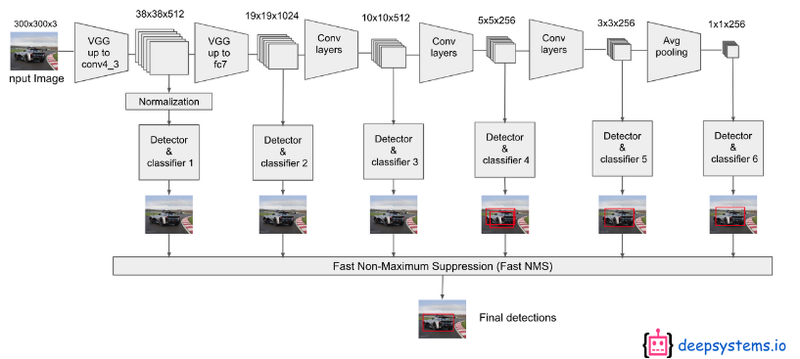
https://www.youtube.com/watch?v=P8e-G-Mhx4k

**Q. Image feature pyramid의 단점은 무엇인가요?**

A.  
YOLO와 비교하였을 때 최소 feature map의 개수만큼 계산량이 많다. 38 x 38 크기의 feature map은 box를 계산하기에는 충분히 깊지 않은 network일 수 있다.

---

Image feature pyramid의 단점은 다음과 같습니다:

1. **계산 비용과 메모리 사용량**: 이미지 피처 피라미드를 사용하면 다양한 크기의 이미지를 생성하고 각각에서 특징을 추출해야 합니다. 이는 계산 비용이 많이 들고, 더 많은 메모리를 필요로 합니다.

2. **처리 시간**: 여러 크기의 이미지에서 특징을 추출하고 합치는 과정은 처리 시간을 증가시킵니다. 이는 특히 실시간 시스템이나 빠른 처리가 필요한 응용 프로그램에서 문제가 될 수 있습니다.

3. **특징 간의 상관관계**: 서로 다른 스케일의 이미지 특징 간에 상관관계를 고려하는 것이 어려울 수 있습니다. 이로 인해 최종 결합된 특징이 최적의 성능을 내지 못할 수 있습니다.

4. **스케일 선택의 어려움**: 적절한 스케일의 이미지를 선택하는 것이 어렵습니다. 너무 많은 스케일을 선택하면 비효율적일 수 있고, 너무 적게 선택하면 중요한 특징을 놓칠 수 있습니다.

5. **이미지 변형에 의한 정보 손실**: 이미지를 다양한 크기로 조정하는 과정에서 원본 이미지의 정보가 손실될 수 있습니다.

이러한 단점들에도 불구하고, 이미지 피처 피라미드는 객체 검출, 이미지 분류 등 다양한 컴퓨터 비전 작업에서 여전히 중요한 역할을 합니다. 최신의 딥러닝 기반 접근 방식들은 이러한 단점들을 극복하기 위한 다양한 기법들을 도입하고 있습니다.

## SSD의 framework
---

SSD는 입력 이미지와 각 객체에 대한 ground truth box만을 필요로 합니다. convolution을 할 때 비율이 다른 default box를 설정하는데, 아래의 그림은 다른 크기의 feature map에서, 각 객체마다 다른 비율의 default box를 4개씩 만들어 놓은 것을 표현한 것입니다. 각 default box에서 default box와 대응되는 bounding box regression을 적용하여 box의 (x, y, w, h)를 찾고 confidence, 즉 box 안에 물체가 있는지 없는지를 예측하는 점수를 예측합니다.

학습할 때 이 default box와 ground truth box를 비교해 ground truth box와 비슷한 default box를 선택하여 positive, 나머지는 negative로 설정합니다. 고양이는 개보다 작기 때문에 8 x 8 feature map에서는 고양이를 잡아내고, 4 x 4 feature map에서는 개를 잡아낸 것을 볼 수 있습니다.

이렇게 각 레이어에서 피쳐 맵들을 가져와 Object Detection을 수행한 결과들을 모두 합하여 localization loss와 confidence loss를 구한 다음, 전체 네트워크를 학습시키는 방식으로 1 Step end-to-end Object Detection 모델을 구성하였습니다.

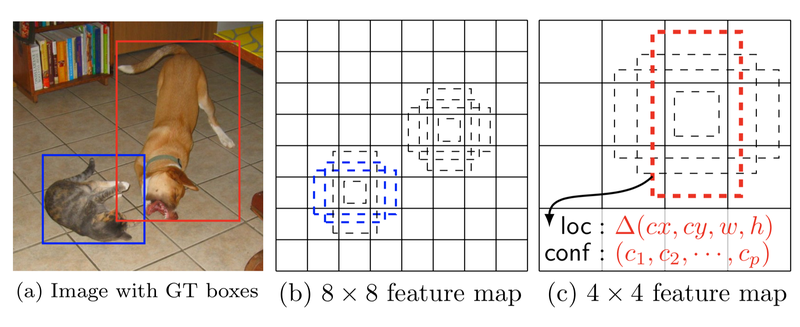
[SSD framework](https://arxiv.org/pdf/1512.02325.pdf)


## Default box를 위한 scale
---

다양한 크기의 Default box 생성을 위해 SSD는 아래와 같은 식을 사용합니다.

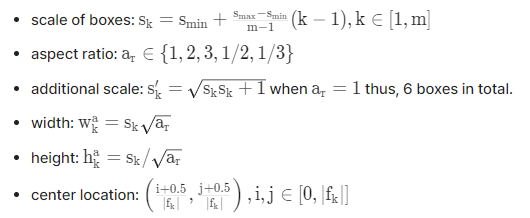

feature map의 개수를 m, $S_{min}$을 0.2, $S_{max}$ 를 0.9라고 하고, 위의 식에 넣으면 각 feature map당 서로 다른 6개의 s 값(scale 값) [0.2, 0.34, 0.48, 0.62, 0.76, 0.9]이 나옵니다. 이 값은 각 feature map에서 default box의 크기가 입력 이미지의 너비와 높이에 비해 얼마나 큰 지를 보여줍니다.

여기서 aspect ratio를 {1, 2, 3, 1/2, 1/3}로 설정하여 default box의 너비와 높이를 구할 수 있습니다. 예를 들어 k=3이라면 scale은 0.48이며 aspect ration가 2라면 너비는 0.68, 높이는 0.34입니다. 논문에서는 1개의 box를 더 추가해 총 6개의 default box의 너비와 높이 값을 구합니다.

입력 이미지에서 default box가 위치할 중심점(center location)의 식에서 $f_{k}$ 는 k번째 feature map의 크기입니다. 대략 예측되는 상자가 정사각형이나 가로로 조금 길쭉한 상자, 세로로 조금 길쭉한 상자이기 때문에 2:3으로 임의로 정해도 학습이 잘 되지만, 특이한 경우, 즉 가로 방향으로 걸어가는 지네와 같은 경우에 위의 비율로 정하면 threshold를 0.5로 했을 때 학습이 되지 않습니다. 따라서 학습할 이미지에 따라서 aspect ration를 조정해야 합니다. 임의로 정하는 것은 비효율적이므로 KNN과 같은 알고리즘을 활용하면 좋은 결과가 나올 것입니다.

이렇게 구해준 중심점 좌표들에 원래의 입력 이미지의 크기를 곱해 중심점을 구하고, 각 중심점마다 default box를 그릴 수 있습니다. 이를 시각화하면 아래와 같습니다.

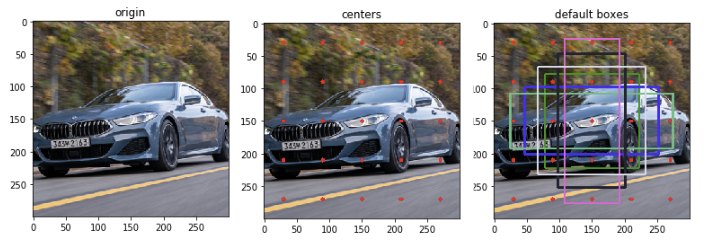
[default box 그리기](https://yeomko.tistory.com/20)

# 19-11. SSD (2) SSD의 Loss와 성능

## Matching strategy
---
학습 전에 ground truth와 defalt box의 jaccard overlap(IoU)이 0.5 이상인 것을 미리 매칭시켜 positive sample로 설정합니다. jaccard overlap이 0.5 이상인 default box를 모두 사용하면 학습 문제를 단순화시켜서 더 높은 성능을 가져올 수 있습니다.

## SSD Loss function
---
SSD Loss function의 식은 아래와 같습니다.

- **Objective Loss Function**
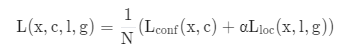


- **Localization Loss Function**
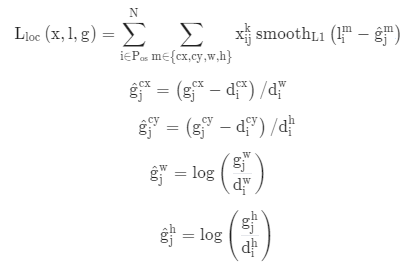


- **Confidence Loss Function**
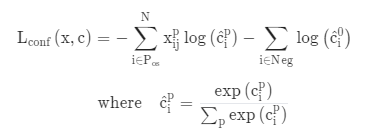


우선 위의 식에서 사용된 용어를 정리하면 아래와 같습니다.

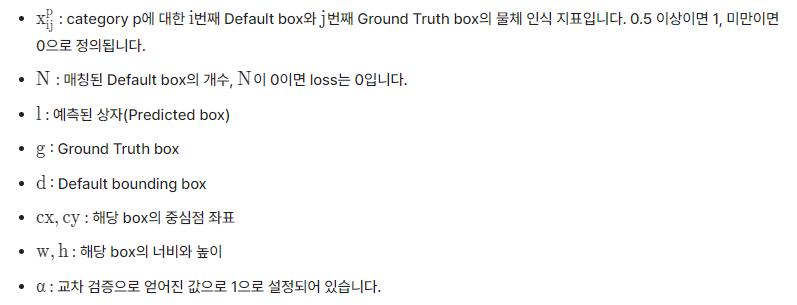


- **Objective Loss Function**

전체 로스는 각 클래스 별로 예측한 값과 실제값 사이의 차이인 $L_{conf}$ 와 bounding box regression 예측값과 실제값 사이의 차이인 $L_{loc}$ 를 더한 값입니다.

- **Localization Loss Function**

Localization Loss Function는 예측된 박스 l과 Ground truth box g 파라미터 사이의 Smooth L1 loss, 즉 bounding box regression loss입니다. $\hat{g}_{j}$ 는 예측해야 할 bounding box의 중심점 좌표, 너비와 높이를 의미합니다. x, y 좌표 값은 절대값이므로 예측값과 실제 값 사이의 차를 default 박스의 너비 혹은 높이로 나누어 0과 1 사이로 정규화시켰습니다. 너비와 높이의 경우엔 로그를 씌워줍니다.

- **Confidence Loss Function**

Confidence Loss Function는 여러 클래스의 confidence에 대한 softmax loss로, cross entropy loss와 비슷합니다. 매칭된(Positive) 클래스를 나타내는 값은 $c_{i}^{p}$ 이고, 그 매칭된 클래스에 softmax를 취해줍니다. 매칭되지 않은(Negative) class를 예측하는 값은 $\hat{c}_{i}^{0}$ 이고 배경이면 1, 아니면 0의 값을 가집니다. 즉 최종 예측된 클래스 점수는 예측할 클래스 + 배경 클래스를 나타내는 지표가 됩니다.

**Q. SSD의 loss function에 대해 각자 이해한 내용을 정리해볼까요?**

A.  
 SSD에서 사용되는 loss function은 각각의 예측된 상자(수식에서 l)와 Ground Truth box(수식에서 g)의 IoU 값을 계산하고, 해당 값을 이용해 Localization Loss와 Confidence Loss를 계산합니다.
Localization Loss는 bounding box regression error를 나타내며, Confidence Loss는 객체의 존재 여부를 나타냅니다.

---


SSD (Single Shot MultiBox Detector)는 객체 검출을 위한 딥러닝 모델 중 하나입니다. SSD의 손실 함수(loss function)는 주로 두 가지 요소로 구성됩니다: 위치 손실(localization loss)과 신뢰도 손실(confidence loss). 여기서의 목표는 네트워크가 객체의 위치를 정확하게 예측하고, 올바른 클래스에 대한 확신(confidence)을 가지도록 하는 것입니다.

1. **위치 손실 (Localization Loss)**:
   - 이 손실은 예측된 경계 상자(bounding box)와 실제 경계 상자 간의 오차를 측정합니다.
   - 주로 Smooth L1 손실 함수를 사용하여, 예측된 상자의 위치와 크기(센터 좌표, 너비, 높이)가 실제 상자와 얼마나 가까운지 계산합니다.
   - 이 손실은 정말 객체가 있는 위치에 대해서만 계산되며, 배경 클래스에 대해서는 계산되지 않습니다.


2. **신뢰도 손실 (Confidence Loss)**:
   - 이 손실은 각 예측된 경계 상자가 어떤 클래스에 속하는지와 그 확률을 평가합니다.
   - 크로스 엔트로피 손실 함수를 사용하여, 각 클래스에 대한 예측 확률과 실제 레이블 간의 차이를 측정합니다.
   - 모든 예측된 상자에 대해 계산되며, 객체가 있든 없든 상관 없이 모든 클래스에 대한 신뢰도를 평가합니다.


SSD의 최종 손실은 이 두 손실의 가중 합으로 구성됩니다. 손실 함수는 일반적으로 다음과 같이 표현됩니다:

$$
L(x, c, l, g) = \frac{1}{N} (L_{conf}(x, c) + \alpha L_{loc}(x, l, g))
$$

여기서:
- \( x \)는 예측된 상자가 실제 객체를 감싸고 있는지 여부를 나타내는 인디케이터(indicator)입니다.
- \( c \)는 클래스 신뢰도를 나타냅니다.
- \( l \)은 예측된 상자의 위치입니다.
- \( g \)는 실제 상자의 위치입니다.
- \( N \)은 매치된 상자의 개수입니다 (즉, 객체를 감싸는 상자의 수).
- $( \alpha )$는 위치 손실과 신뢰도 손실의 상대적 가중치입니다.

이 손실 함수를 최소화함으로써, 모델은 객체의 위치를 정확하게 예측하고 각 객체에 대한 올바른 클래스를 신뢰도 높게 예측하도록 학습합니다.

## Hard negative mining
---
대부분의 Default box가 배경이기 때문에 $X_{ij}^{P}$이 0인 경우가 많습니다. 따라서 마지막 class의 loss 부분에서는 default box를 high confidence 순으로 정렬해 상위만 가져다 써서 positive:negative 비율을 1:3으로 정해 출력합니다. 이로써 최적화 속도가 빨라지고 안정적으로 학습된다고 하네요.


## SSD의 성능
---
SSD의 성능은 아래와 같이 Faster R-CNN보다는 성능이 조금 낮지만 속도는 빠르고, YOLO보다는 성능이 높고 속도는 느립니다. SSD가 속도와 정확성을 동시에 잡자는 목표를 갖고 있었다는 것을 생각해보면, 그 목표를 이룬 것 같죠?

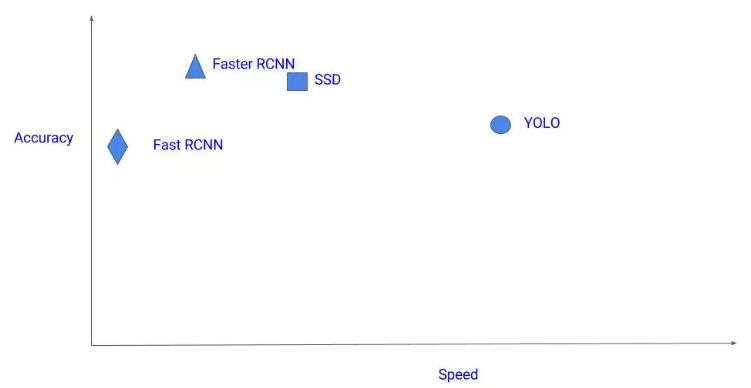
[SSD와 기타 object detection 모델의 정확도와 속도 비교](https://cv-tricks.com/object-detection/faster-r-cnn-yolo-ssd/)


YOLO가 작은 물체를 잘 찾아내지 못했던 것 역시 SSD에서는 어느 정도 해결한 것 같습니다. 심지어 YOLO v2보다 성능이 더 좋다는 것을 알 수 있습니다.


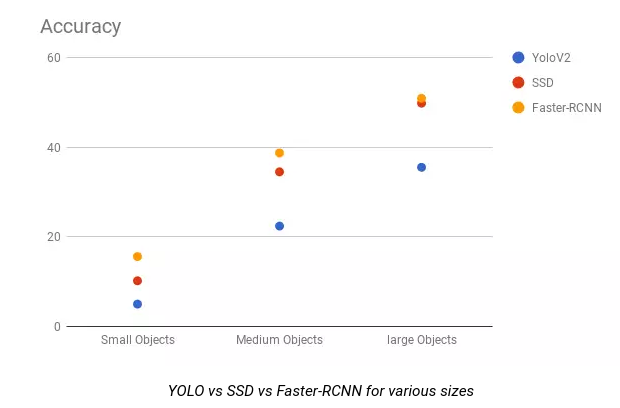
https://cv-tricks.com/object-detection/faster-r-cnn-yolo-ssd/


## FCOS
---

[FCOS:Fully Convolutional One-Stage Object Detectionan](https://arxiv.org/pdf/1904.01355.pdf)는 기존의 anchor box기반에서 벗어나 pixelwise로 예측하는 FCOS를 제안했습니다. Anchor box를 사용하면서 생기는 부작용(예: 학습 계산량, 하이퍼파라미터에 민감한 성능 등)을 해결하면서도 좋은 성능을 보입니다.

자세한 내용은 아래의 자료를 참고하세요.

- [Brief Review of Anchor-Free Object Detection](https://blog.si-analytics.ai/72)

# 19-12. Face Detection을 위한 모델들

지금까지 One-Stage Detection의 가장 대표적인 두가지 모델인 YOLO와 SSD에 대해 살펴보았습니다. 다음 실습에서는 SSD를 활용한 Face Detection을 실제로 구현해 보는 과정을 통해 더욱 깊이있게 알아보게 될 것입니다.

SSD 이후로 특히 Face Detection 모델이 지속적으로 발표되었습니다. [papers with code](https://paperswithcode.com/task/face-detection)에서 검색하면 Face Detection에 대한 다양한 모델을 살펴볼 수 있습니다.

그럼 SOTA Face Detection 모델을 중심으로 간단히 살펴볼까요?

## TinaFace
---
논문 [TinaFace: Strong but Simple Baseline for Face Detection](https://arxiv.org/pdf/2011.13183v3.pdf)에서는 Face Detection과 Object Detection이 다르지 않다는 점을 지적하면서, Object Detection에서 사용했던 기법을 사용해 단순하지만 좋은 성능을 보이는 모델인 TinaFace를 소개합니다. TinaFace는 백본으로 ResNet50을 사용했고 기존에 존재했던 모듈(Feature Pyramid Network, Inception block, FCN 등)을 활용해 만들어졌습니다. 자세한 내용은 논문을 참고해 보세요.


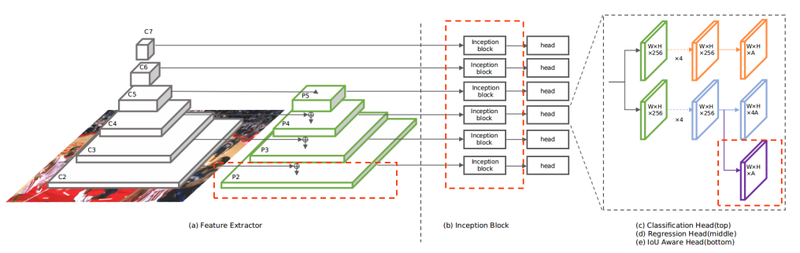
[TinaFace 모델 아키텍처](https://arxiv.org/pdf/2011.13183v3.pdf)


## RetinaFace
---
RetinaFace는 1-Stage face detector로서, 다양한 얼굴 크기에 대해 pixel-wise face localization을 수행했습니다. 이를 위해 기존의 box classification과 regression 브랜치와 함께 extra-supervised and self-supervised multi-task learning을 하였다고 합니다. 그 결과는 아래의 그림에 나와 있듯 face score, face box, 5개의 얼굴 랜드마크, 3D face vertices(정점)라고 하네요. 자세한 내용은 논문 [RetinaFace: Single-stage Dense Face Localisation in the Wild](https://arxiv.org/pdf/1905.00641.pdf)을 참고해 보세요.


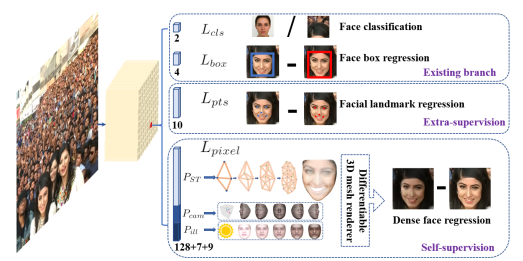
[The single-stage pixel-wise face localization](https://arxiv.org/pdf/1905.00641.pdf)


## DSFD
---
DSFD는 Feature Enhance Module(FEM), Progressive Anchor Loss(PAL), Improved Anchor Matching (IAM)라는 기법을 사용해 성능을 높인 모델인데요, 언급한 세 기법이 two-stream으로 디자인되어 있어서 Dual Shot Face Detector라는 이름이 붙었다고 합니다. 자세한 내용은 논문 [DSFD: Dual Shot Face Detector](https://arxiv.org/pdf/1810.10220.pdf)을 참고해 보세요.

## S3FD
---
S3FD는 하나의 deep neural network를 사용해 다양한 얼굴 크기에 대해 face detection을 수행하며, 특히 작은 얼굴을 잘 찾는 모델입니다. 다양한 크기의 얼굴을 잘 찾기 위해 layer의 넓은 범위에 anchor를 바둑판 형식으로 배열하였고, anchor 크기도 새롭게 디자인했다고 합니다. 그 외에도 작은 얼굴을 잘 찾기 위해 다양한 기법을 사용했다고 하는데요, 자세한 내용은 논문 [S3FD: Single Shot Scale-invariant Face Detector](https://arxiv.org/abs/1708.05237)을 참고해 보세요.

지금까지 몇 가지 Face Detection 모델을 살펴보았습니다. 이 외에도 많은 모델이 있으니 관심이 있으시면 한번 살펴보시기 바랍니다. 지금까지 수고 많으셨습니다!

**Q. 동일한 조건이라고 했을 때, 본문에서 소개된 TinaFace, RetinaFace, DSFD, S3FD 중에서 어떤 모델이 가장 좋은 성능을 보일까요? (저는 chatGPT에게 물어보았습니다😎)**

A.  
최근에 공개된 얼굴 검출 성능 비교 대회 중 하나인 "WiderFace Benchmark"에서는 RetinaFace가 가장 높은 성능을 보였다고 하네요. 이 대회에서는 다양한 얼굴 크기, 각도, 조명 등을 포함한 어려운 환경에서 검출 성능을 평가했기에 RetinaFace 모델은 현재 가장 성능이 우수한 모델 중 하나라고 설명해주고 있습니다👍

다만, 딥러닝 모델의 성능을 평가하기 위해서는 내가 해결하고자 하는 Task의 성격, 사용되는 데이터셋, 하드웨어, 소프트웨어 등의 다양한 요소에 따라 다를 수 있기에 해당 문제에 적합하고 최적화된 모델을 사용하는 것이 중요하다고 강조하고 있네요~

---

TinaFace, RetinaFace, DSFD (Deeply Supervised Face Detector), 그리고 S3FD (Single Shot Scale-invariant Face Detector)는 모두 얼굴 검출을 위해 설계된 딥러닝 기반의 객체 검출 모델입니다. 이러한 모델들의 성능은 다양한 요소에 의해 영향을 받습니다:

1. **데이터셋**: 모델이 훈련된 데이터셋의 다양성과 크기는 성능에 큰 영향을 미칩니다. 더 다양하고 방대한 데이터셋에서 훈련된 모델이 일반적으로 더 좋은 성능을 보일 가능성이 높습니다.


2. **모델 아키텍처**: 각 모델의 아키텍처는 특정 유형의 얼굴(예: 다양한 각도, 표정, 조명 조건 등)을 검출하는 데 더 적합할 수 있습니다. 모델의 아키텍처에 따라 성능이 달라질 수 있습니다.


3. **학습 과정**: 학습률, 손실 함수, 정규화 기법 등 학습 과정에서 사용된 기법들도 모델의 성능에 영향을 미칩니다.


4. **평가 지표**: 모델의 성능은 평가 지표에 따라 달라집니다. 예를 들어, 정밀도(precision), 재현율(recall), F1 점수 등 다양한 지표가 사용될 수 있습니다.


5. **실제 운영 환경**: 실제 운영 환경에서의 성능은 실험실 환경에서의 성능과 다를 수 있습니다. 예를 들어, 실시간 처리 속도, 배경 잡음, 적응성 등이 중요한 요소가 될 수 있습니다.


현재 제가 가지고 있는 최신 정보(2023년 4월까지)로는 이 중 어떤 모델이 "가장 좋은" 성능을 보일지 일반화해서 말하기는 어렵습니다. 각 모델의 성능은 최신 연구 논문, 벤치마크, 그리고 사용 사례에 따라 달라질 수 있기 때문에, 구체적인 성능 평가를 위해서는 최신 연구 결과와 리뷰를 참조하는 것이 좋습니다.

만약 최신 정보를 얻고 싶으시다면, 관련 연구 논문이나 벤치마크 결과를 찾아보는 것이 가장 확실한 방법입니다. 제가 직접 최신의 비교 연구를 찾아볼까요?

# 19-13. 마무리하며

이번 시간에는 Dlib 얼굴 인식에서 개선해 볼 포인트와 YOLO, SSD 등 Face Detection을 위한 딥러닝 모델들에 대해 알아보았습니다.

속도 개선을 위해 1-Stage Detector의 대표 모델인 YOLO와 SSD의 특징에 대해 공부했었고, 특히나 YOLO의 경우 v1 ~ v5 부터 시작해서 PPYOLO, YOLOR, YOLOX, YOLOS까지 발전 과정과 각각의 모델이 갖는 컨셉들에 대해 논문으로 접해보았습니다.

YOLO v1과 SSD의 loss function 수식들을 보면서 어떻게 구성되어 있는지, 각각의 notation과 수식이 갖는 의미는 무엇인지도 배웠죠.
수식을 이해하는 것이 쉽지는 않으셨을텐데, 잘 따라와주셨습니다!😎

더 빠르고, 좋은 성능을 보이는 얼굴 인식 어플리케이션을 제작할 수 있는 밑거름이 되는 유익한 시간이었기를 바라면서.. 마무리를 하는 차원에서 종합 퀴즈를 풀어볼까요?

## 종합 퀴즈
---
지금까지 여러분들이 얼마나 학습을 충실히 하셨는지 알아볼까 합니다. 여러분의 실력을 쑥쑥 향상시켜줄 수 있는 퀴즈이기도 하므로 배운 내용을 다시 생각하면서 아래의 퀴즈를 풀어보세요. 🤗

**Q. 네트워크 구조와 바운딩 박스 예측에 대해서 YOLO v1과 SSD의 차이점을 설명해볼까요?**

A.  
YOLO v1 : 단일 컨볼루션 신경망으로 구성되어 있으며, 입력 이미지를 그리드로 나누고 각 그리드 셀마다 바운딩 박스의 좌표 (x, y, 너비, 높이)를 직접 예측합니다.

SSD : 컨볼루션 신경망으로 구성된 피라미드 형태의 서로 다른 feature map을 사용하여 여러 가지 크기의 바운딩 박스를 예측합니다.


---

YOLO (You Only Look Once) v1과 SSD (Single Shot MultiBox Detector)는 실시간 객체 검출을 위해 널리 사용되는 두 가지 다른 접근 방식의 딥러닝 모델입니다. 이들의 주된 차이점은 네트워크 구조와 바운딩 박스 예측 방식에 있습니다.

**네트워크 구조:**

- **YOLO v1**:
  - YOLO는 단일 신경망을 사용하여 이미지를 그리드로 나누고, 각 그리드 셀에 대해 바운딩 박스와 클래스 확률을 동시에 예측합니다.
  - 네트워크는 전체 이미지를 한 번에 처리하고, 각 그리드 셀별로 객체의 중심이 그 셀에 있을 때만 객체를 검출합니다.
  - 각 그리드 셀은 여러 바운딩 박스를 예측하지만, 주로 한 객체만을 검출하는 데 최적화되어 있습니다.

- **SSD**:
  - SSD는 다양한 크기와 비율의 기본 박스(prior boxes)를 여러 피처 맵(feature map) 크기에서 예측하여 객체를 검출합니다.
  - 각 피처 맵은 서로 다른 스케일의 객체를 검출하는 데 사용되며, 이를 통해 SSD는 YOLO에 비해 다양한 크기의 객체를 더 잘 검출할 수 있습니다.
  - SSD는 합성곱 신경망의 끝 부분에서 여러 피처 맵을 사용하여 바운딩 박스와 클래스 확률을 예측합니다.

**바운딩 박스 예측:**

- **YOLO v1**:
  - 바운딩 박스 예측은 그리드 셀마다 고정된 수의 바운딩 박스를 예측하고, 각 박스에 대한 클래스 확률을 곱하여 최종 점수를 산출합니다.
  - 이 점수는 객체의 존재 여부와 해당 객체가 특정 클래스에 속할 확률을 동시에 나타냅니다.
  - YOLO는 종종 다른 객체 검출 모델에 비해 빠르지만, 작은 객체나 서로 가까이 있는 객체를 검출하는 데는 상대적으로 성능이 떨어질 수 있습니다.

- **SSD**:
  - SSD는 미리 정의된 다양한 크기와 비율의 기본 박스에 대한 조정(offsets)을 학습하여 바운딩 박스를 예측합니다.
  - 각 기본 박스에 대해, 네트워크는 객체가 있는지 없는지, 그리고 어떤 클래스에 속하는지를 예측합니다.
  - 이 접근 방식은 다양한 크기의 객체를 더 잘 검출할 수 있도록 해주며, 특히 작은 객체에 대한 검출 성능이 YOLO보다 좋을 수 있습니다.

종합하면, YOLO v1은 전체 이미지를 빠르게 처리하는 데 초점을 맞추고 있으며, SSD는 다양한 크기의 객체를 검출할 수 있는 능력에 더 중점을 두고 있습니다. 두 모델 모두 실시간 처리에 적합하지만, YOLO는 빠른 속도에서, SSD는 다양한 크기의 객체를 정확하게 검출하는 데 더 우수한 성능을 나타낼 수 있습니다.


---

### 차이점:
- **출력 스케일**: YOLO는 고정된 수의 그리드 셀에서 작동하는 반면, SSD는 여러 스케일의 특징 맵에서 동작하여 보다 다양한 크기의 객체를 검출할 수 있습니다.


- **바운딩 박스의 다양성**: YOLO는 각 그리드 셀당 고정된 수의 바운딩 박스를 예측하는 반면, SSD는 다양한 크기와 비율의 바운딩 박스를 예측합니다.


- **훈련과 속도**: YOLO는 전체 이미지를 한 번에 처리하기 때문에 빠르지만, 작은 객체에 대해서는 덜 정확할 수 있습니다. SSD는 다양한 해상도에서 작업을 수행하기 때문에 작은 객체에 대해서도 더 나은 성능을 보일 수 있지만, 상대적으로 더 많은 계산을 요구합니다.


- **정확성**: SSD는 다양한 크기의 객체에 대해 더 나은 성능을 보이는 경향이 있지만, YOLO는 큰 객체와 잘 정의된 객체에 대해 매우 빠르고 정확한 예측을 제공합니다.


- **정확도와 재현율**: 일반적으로 SSD는 작은 객체를 포함한 다양한 크기의 객체에 대해 더 높은 정확도와 재현율을 보입니다. YOLO는 크고 명확하게 분리된 객체에 대해 매우 빠른 속도로 높은 성능을 제공하지만, 작은 객체나 겹치는 객체를 놓치는 경우가 더 많습니다.


- **학습 메커니즘**: YOLO는 객체 분류와 바운딩 박스 예측을 동시에 수행하는 반면, SSD는 객체의 위치와 크기를 조정하는 방식으로 바운딩 박스를 예측합니다. 이는 YOLO가 전체 이미지에 대한 전반적인 컨텍스트를 이해하는 데 강점을 가지지만, SSD는 지역적인 특징을 더 잘 활용하여 정밀한 위치 조정이 가능합니다.


- **모델 복잡도**: SSD 모델은 추가적인 컨볼루션 레이어로 인해 YOLO v1에 비해 더 복잡할 수 있습니다. 이는 추가적인 계산 부담을 의미하지만, 다양한 크기의 특징 맵을 통해 더 세분화된 검출이 가능합니다.


- **실시간 성능**: YOLO는 이름에서 알 수 있듯이 한 번의 추론만으로 객체를 검출하고 분류하기 때문에 매우 빠른 추론 속도를 가집니다. 반면 SSD는 다양한 크기의 특징 맵을 사용하기 때문에 조금 더 많은 계산이 필요할 수 있으나, 최적화를 통해 여전히 실시간 성능을 제공할 수 있습니다.


각각의 모델은 특정 상황과 요구 사항에 따라 장단점을 가지며, 최선의 선택은 사용 사례에 따라 달라질 수 있습니다. 예를 들어, 고속 추론이 필수적인 시나리오에서는 YOLO가 더 적합할 수 있고, 다양한 크기의 객체를 정확하게 검출해야 하는 경우 SSD가 더 나은 선택일 수 있습니다.

종합 퀴즈는 괜찮았나요? 학습을 충실히 하셨다면 쉽게 해결하셨을 것이라 생각합니다. 혹시라도 답을 맞히지 못하셨다면, 다시 한번 배웠던 내용을 복습해 보세요.

지금까지 수고 많이 하셨습니다!